In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense , Input , Flatten , LeakyReLU , Reshape , Dropout ,Conv2D ,Activation ,BatchNormalization ,Conv2DTranspose
from keras.models import Model , Sequential
from tensorflow.keras.optimizers import Adam , RMSprop

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, _), (test_images, _) = fashion_mnist.load_data()

X = 2 * (np.vstack((train_images , test_images)) / 255.0) - 1


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
SHAPE_OF_IMAGES = (28 , 28 , 1)

n_of_pixels = 28 * 28

In [4]:
def discriminator_dense():
  inp = Input(shape=SHAPE_OF_IMAGES)

  x = Flatten()(inp)
  x = Dropout(0.4)(x)
  x = Dense(1024 , activation = LeakyReLU(alpha=0.2))(x)
  x = Dropout(0.4)(x)
  x = Dense(512 , activation = LeakyReLU(alpha=0.2))(x)
  x = Dropout(0.4)(x)
  x = Dense(512 , activation = LeakyReLU(alpha=0.2))(x)
  out = Dense(1 , activation = 'sigmoid')(x)

  model = Model(inp , out)
  model.compile(optimizer=Adam(lr=0.0002 , beta_1=0.5), loss='binary_crossentropy')
  
  return model




def generator(n):
  inp = Input(shape=(n))

  x = Dense(256 , activation = LeakyReLU(alpha=0.2))(inp)
  x = Dense(512 , activation = LeakyReLU(alpha=0.2))(x)
  x = Dense(1024 , activation = LeakyReLU(alpha=0.2))(x)
  x = Dense( n_of_pixels, activation = 'tanh')(x)

  out = Reshape((28,28,1))(x)

  return Model(inp,out)







def GAN(disc , gen):
  disc.trainable = False

  model = Sequential()

  model.add(gen)
  model.add(disc)

  model.compile(optimizer=Adam(lr=0.0002 , beta_1=0.5) , loss="binary_crossentropy")

  return model



In [5]:
disc = discriminator_dense()

disc.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
gen = generator(100)

gen.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 256)               25856     
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 dense_6 (Dense)             (None, 1024)              525312    
                                                                 
 dense_7 (Dense)             (None, 784)               803600    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 1,486,352
Trainable params: 1,486,352
Non-tra

In [7]:
gan = GAN(disc , gen)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, '[[0.49028352]]')

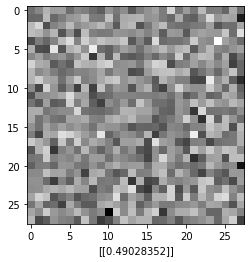

In [8]:
plt.imshow(gen.predict(np.random.randn(100).reshape(1,100)).reshape(28,28) , cmap='gray')
plt.xlabel(disc.predict(gen.predict(np.random.randn(100).reshape(1,100))))

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, '[[0.50550765]]')

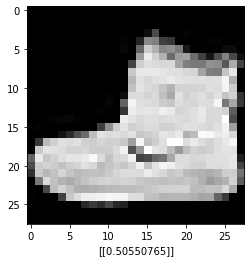

In [9]:
plt.imshow(X[0].reshape(28,28) , cmap='gray' )
plt.xlabel(disc.predict(X[0].reshape(1,28,28,1)))

In [10]:
from tqdm import tqdm

In [11]:
epochs = 100
batch_size = 256
half_batch = batch_size // 2
n = 100
losses = []

ep :  0


100%|██████████| 273/273 [00:18<00:00, 14.43it/s]


losses ->  0.5643991231918335   1.3134701251983643


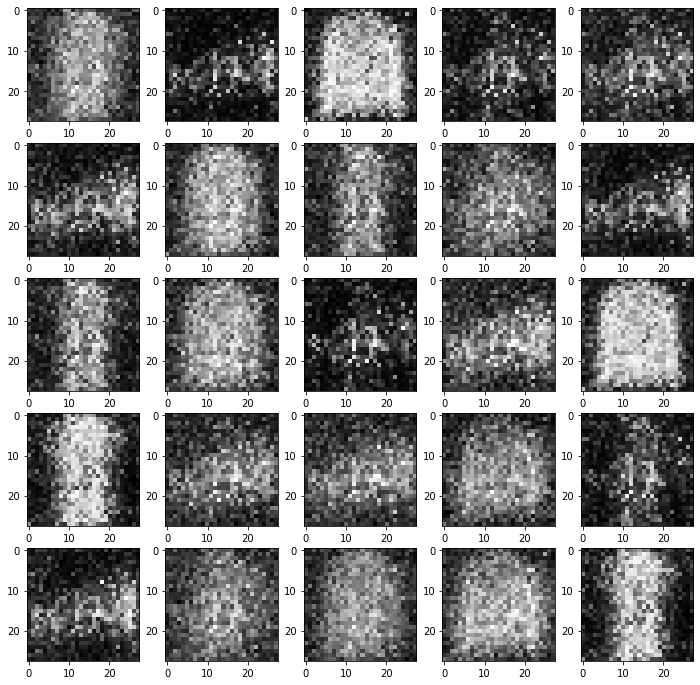

ep :  1


100%|██████████| 273/273 [00:18<00:00, 14.80it/s]


losses ->  0.49338820576667786   1.3916995525360107


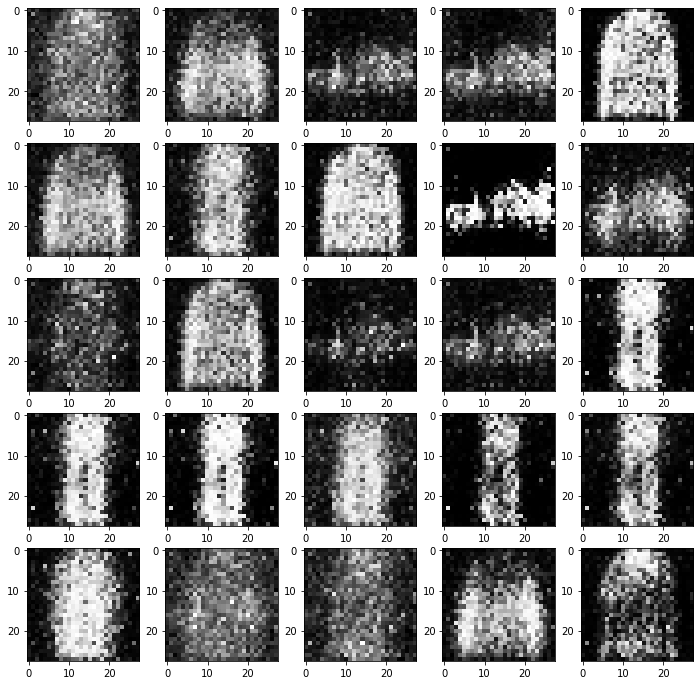

ep :  2


100%|██████████| 273/273 [00:17<00:00, 15.50it/s]


losses ->  0.6266490817070007   0.9424639940261841


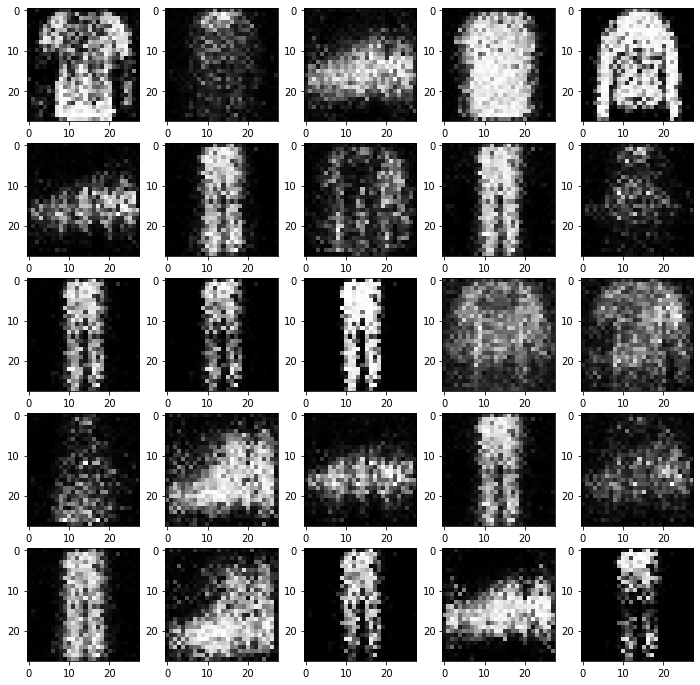

ep :  3


100%|██████████| 273/273 [00:17<00:00, 15.37it/s]


losses ->  0.6277788281440735   0.9891453385353088


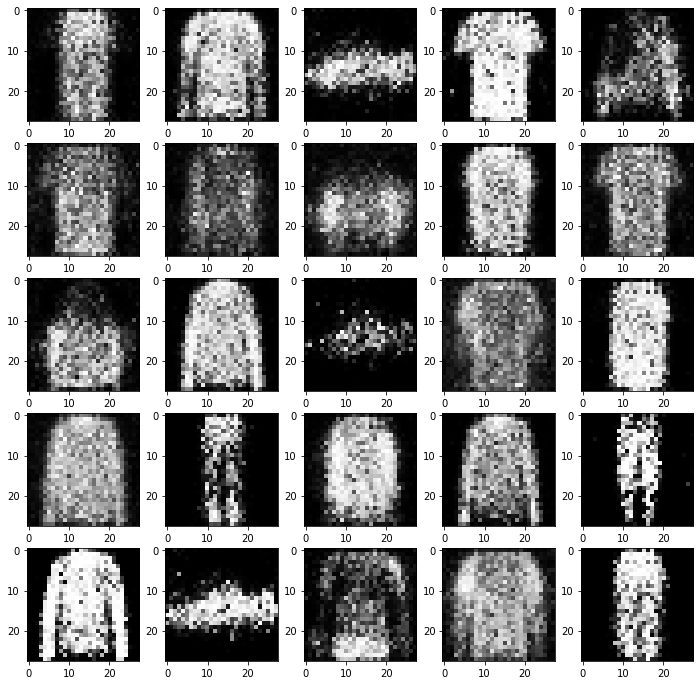

ep :  4


100%|██████████| 273/273 [00:17<00:00, 15.17it/s]


losses ->  0.6443139910697937   0.9116180539131165


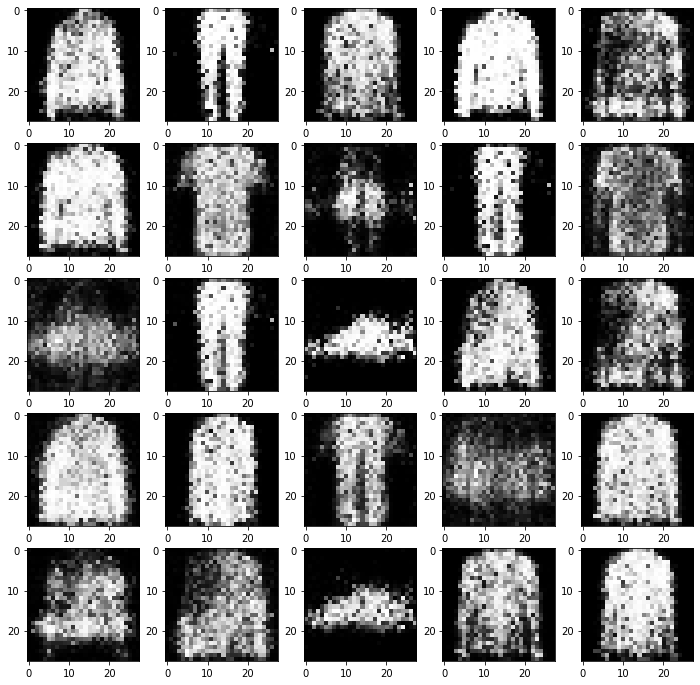

ep :  5


100%|██████████| 273/273 [00:17<00:00, 15.40it/s]


losses ->  0.6822922229766846   0.8999170064926147


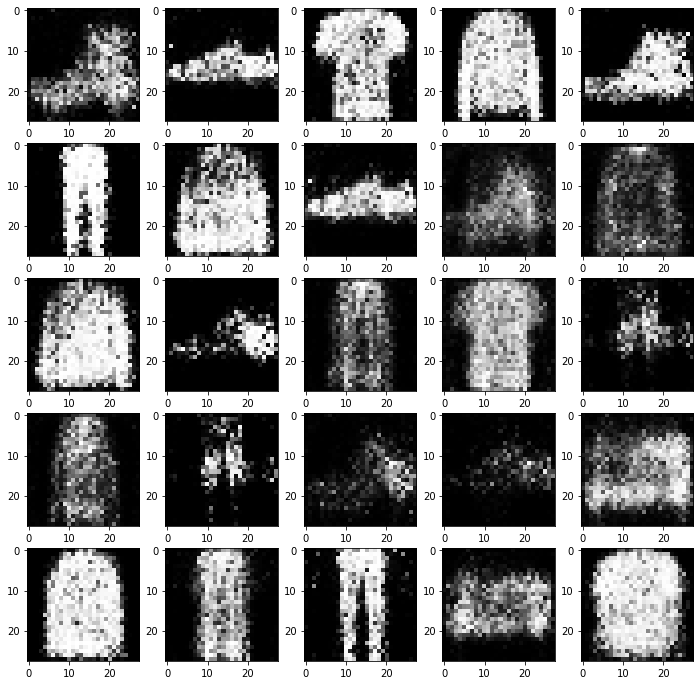

ep :  6


100%|██████████| 273/273 [00:18<00:00, 14.69it/s]


losses ->  0.6423146724700928   0.8471760749816895


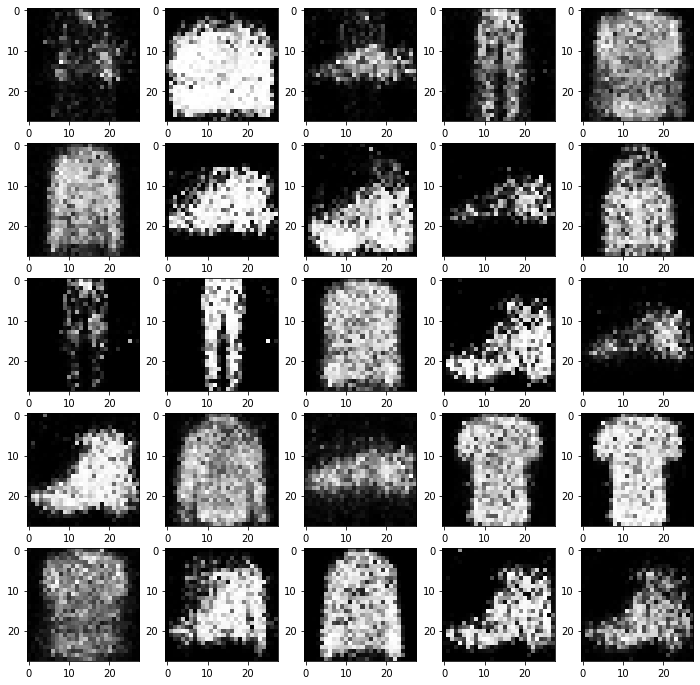

ep :  7


100%|██████████| 273/273 [00:18<00:00, 15.10it/s]


losses ->  0.690872848033905   0.8023970127105713


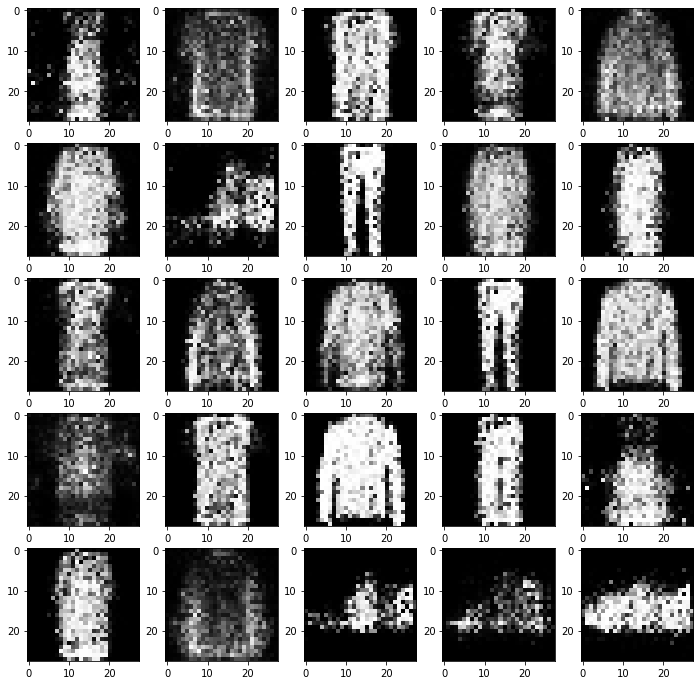

ep :  8


100%|██████████| 273/273 [00:17<00:00, 15.37it/s]


losses ->  0.6796552538871765   0.808942437171936


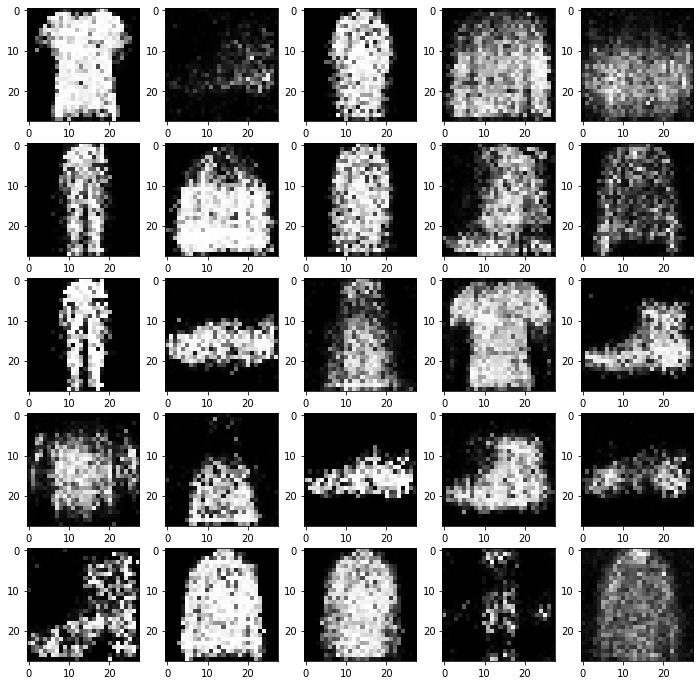

ep :  9


100%|██████████| 273/273 [00:17<00:00, 15.20it/s]


losses ->  0.6658713817596436   0.8827320337295532


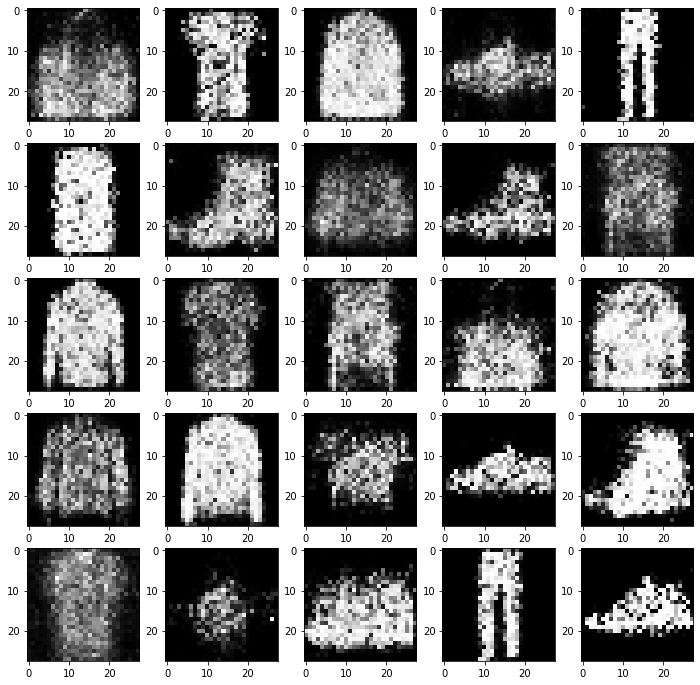

ep :  10


100%|██████████| 273/273 [00:18<00:00, 15.02it/s]


losses ->  0.6517825126647949   0.7974749207496643


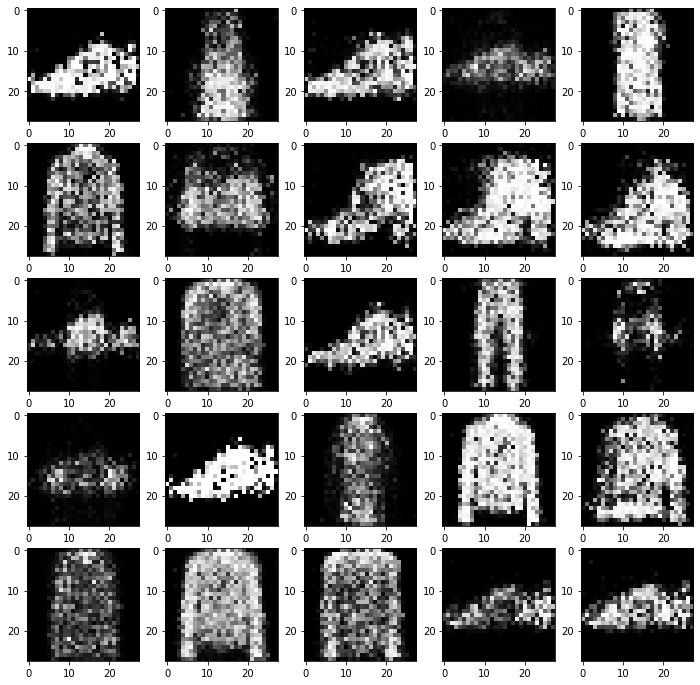

ep :  11


100%|██████████| 273/273 [00:18<00:00, 14.48it/s]


losses ->  0.6801572442054749   0.7787957787513733


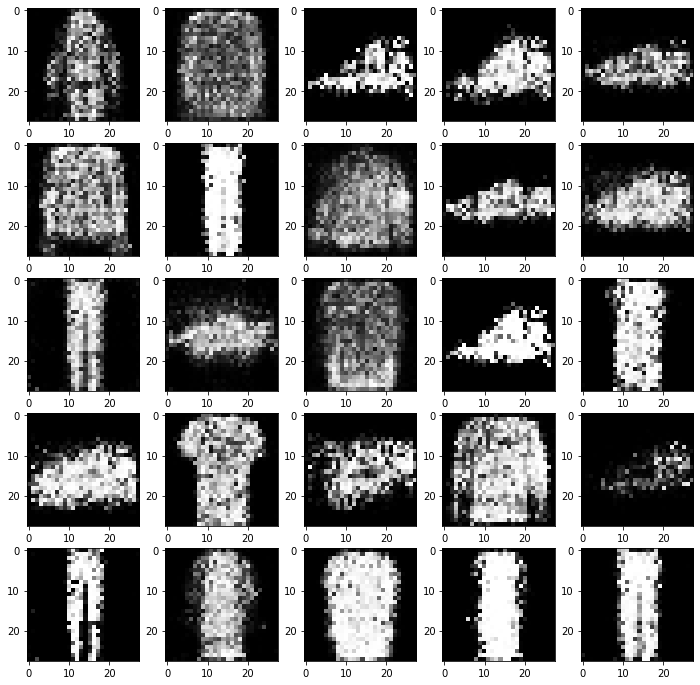

ep :  12


100%|██████████| 273/273 [00:18<00:00, 14.98it/s]


losses ->  0.6751181483268738   0.7640984058380127


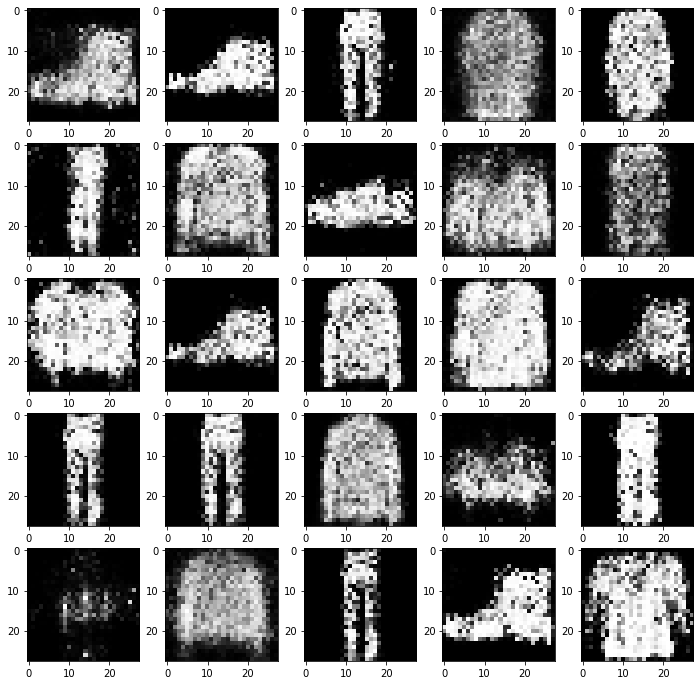

ep :  13


100%|██████████| 273/273 [00:17<00:00, 15.21it/s]


losses ->  0.6776818037033081   0.8476468324661255


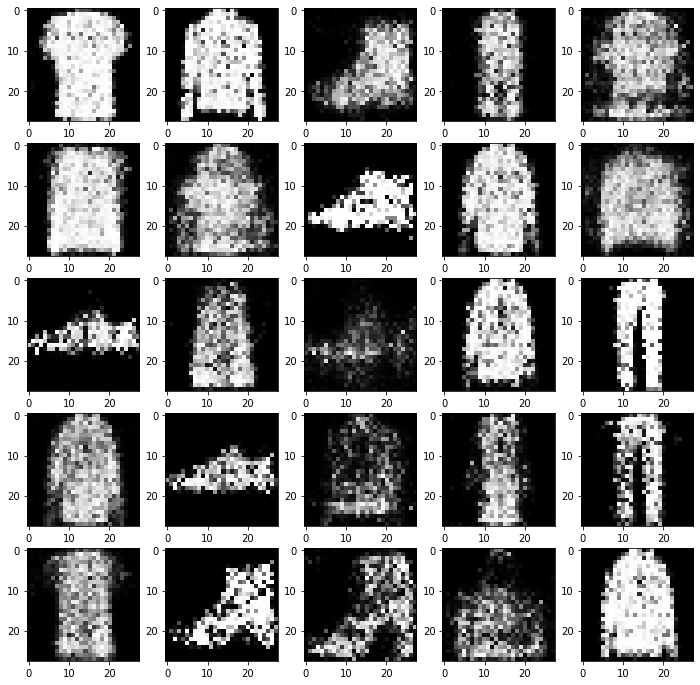

ep :  14


100%|██████████| 273/273 [00:18<00:00, 15.00it/s]


losses ->  0.6911540031433105   0.7366406917572021


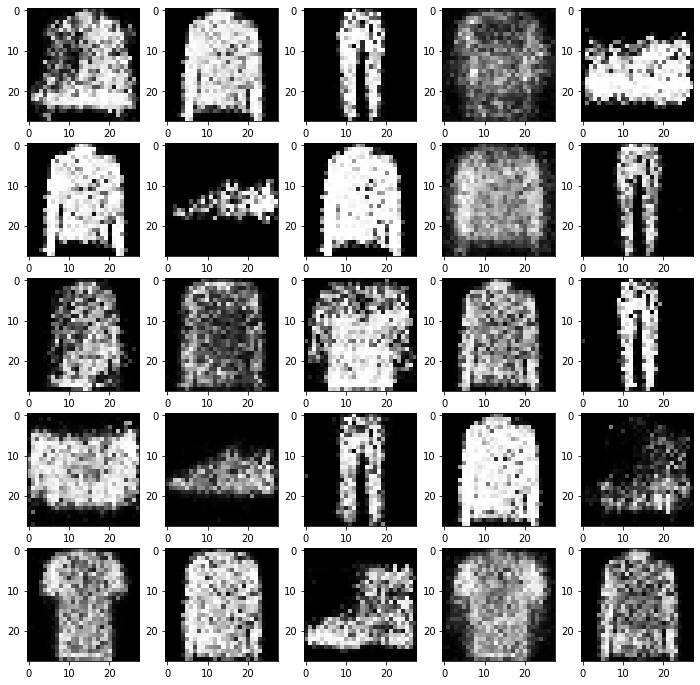

ep :  15


100%|██████████| 273/273 [00:18<00:00, 14.90it/s]


losses ->  0.6823155283927917   0.7957708239555359


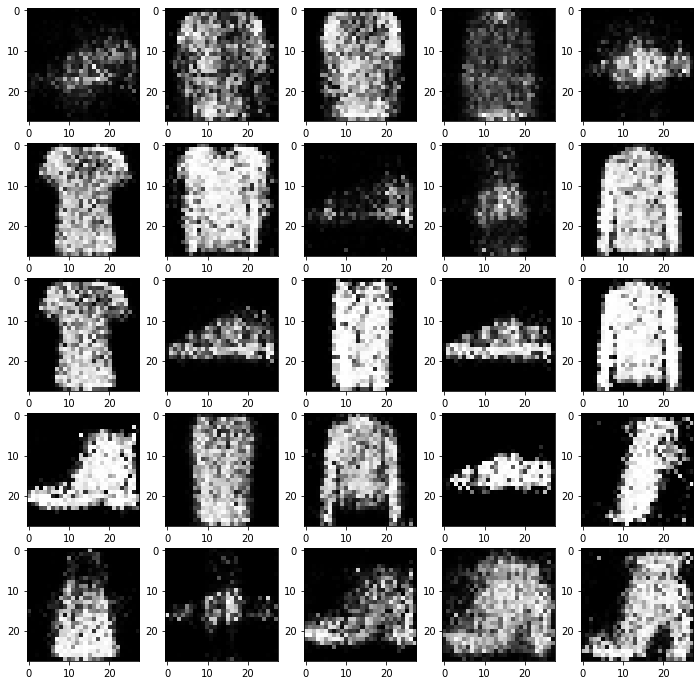

ep :  16


100%|██████████| 273/273 [00:18<00:00, 14.63it/s]


losses ->  0.7085273265838623   0.8025590777397156


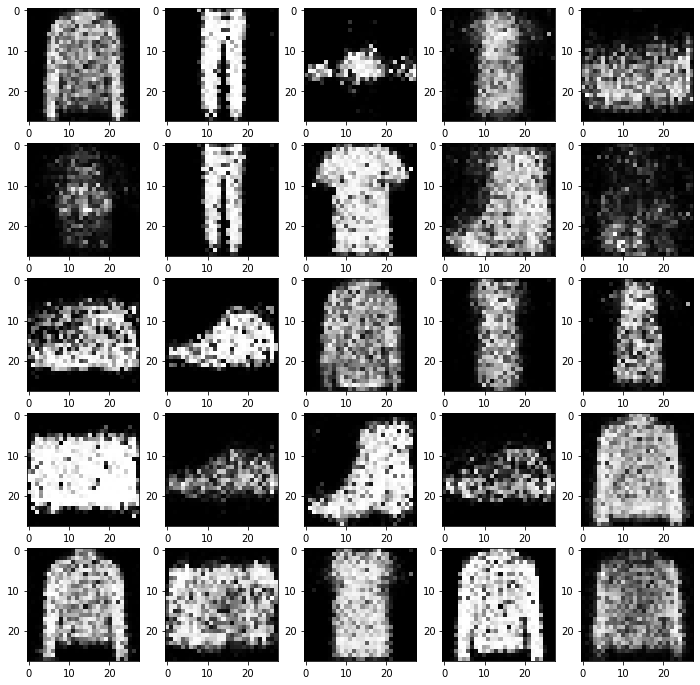

ep :  17


100%|██████████| 273/273 [00:18<00:00, 15.01it/s]


losses ->  0.665408194065094   0.7728275656700134


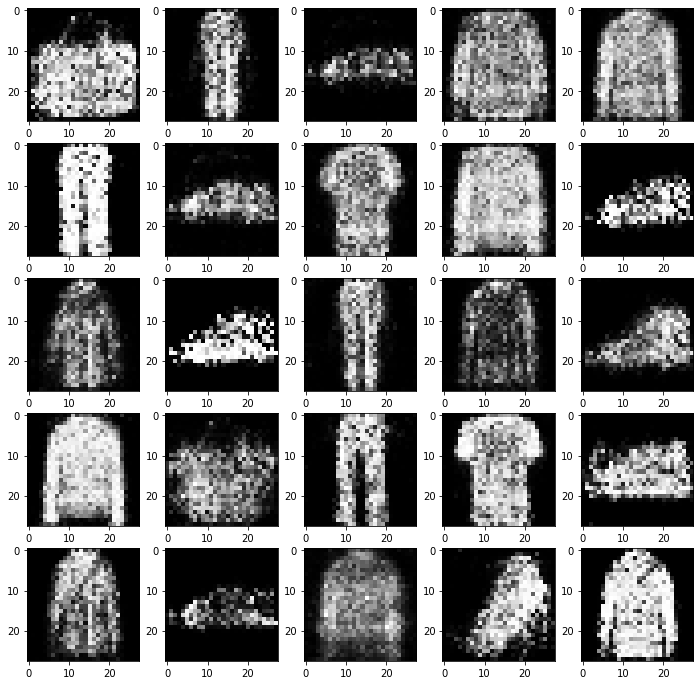

ep :  18


100%|██████████| 273/273 [00:18<00:00, 14.83it/s]


losses ->  0.6605517268180847   0.8163139820098877


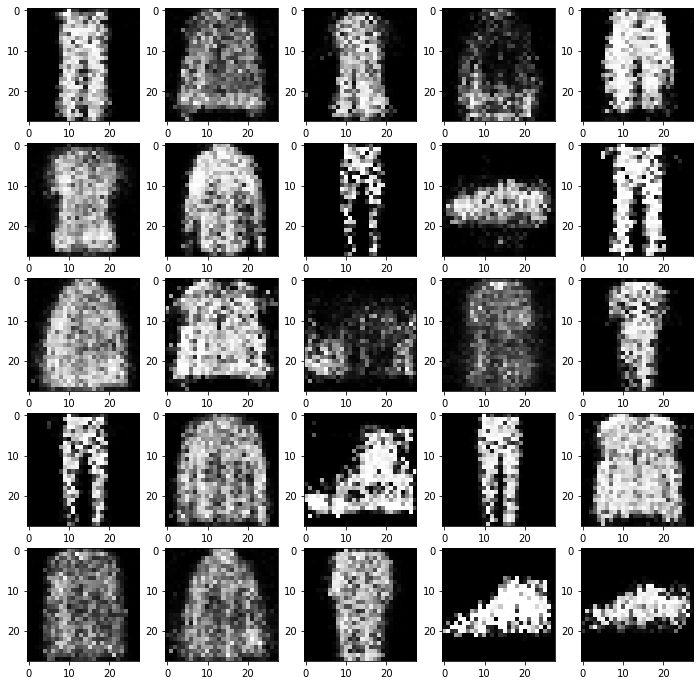

ep :  19


100%|██████████| 273/273 [00:18<00:00, 14.98it/s]


losses ->  0.6811858415603638   0.7943181991577148


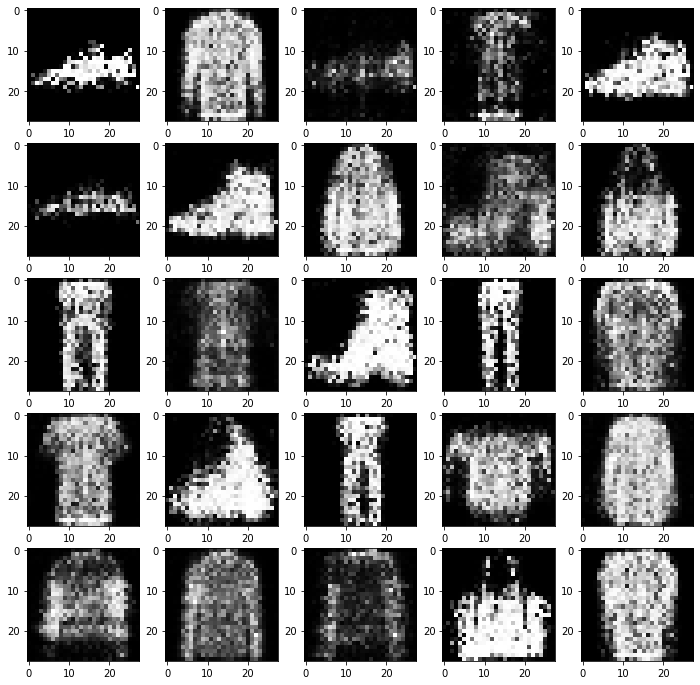

ep :  20


100%|██████████| 273/273 [00:18<00:00, 14.90it/s]


losses ->  0.6660613417625427   0.7890945672988892


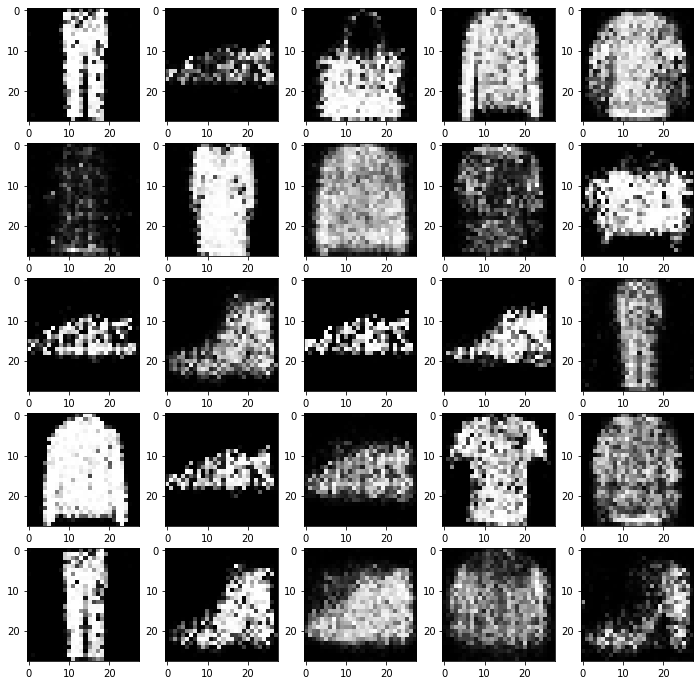

ep :  21


100%|██████████| 273/273 [00:18<00:00, 15.11it/s]


losses ->  0.697077214717865   0.7542784810066223


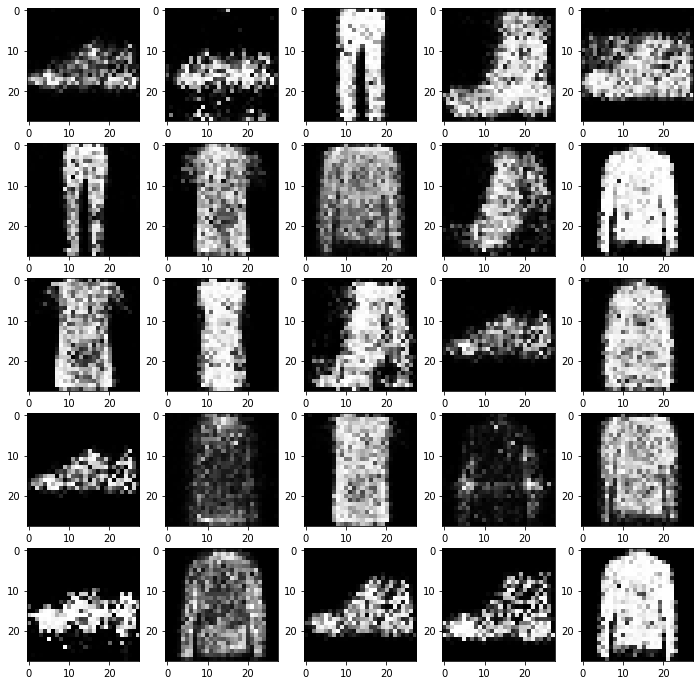

ep :  22


100%|██████████| 273/273 [00:18<00:00, 14.71it/s]


losses ->  0.689888596534729   0.7380942106246948


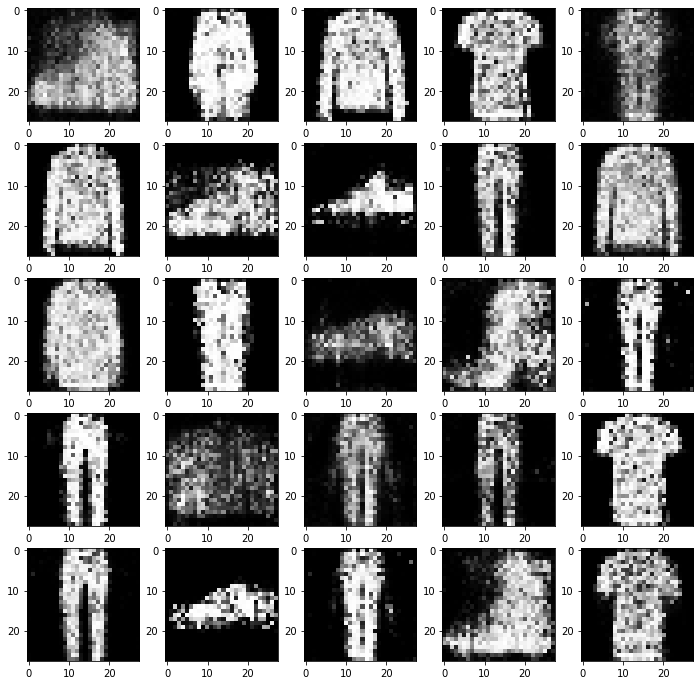

ep :  23


100%|██████████| 273/273 [00:18<00:00, 14.82it/s]


losses ->  0.6703309416770935   0.7786333560943604


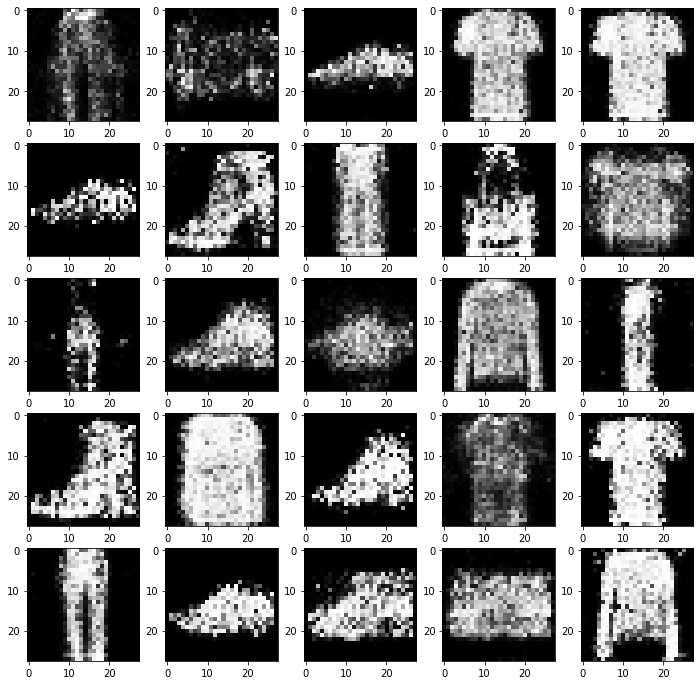

ep :  24


100%|██████████| 273/273 [00:18<00:00, 14.74it/s]


losses ->  0.6760305166244507   0.7441169023513794


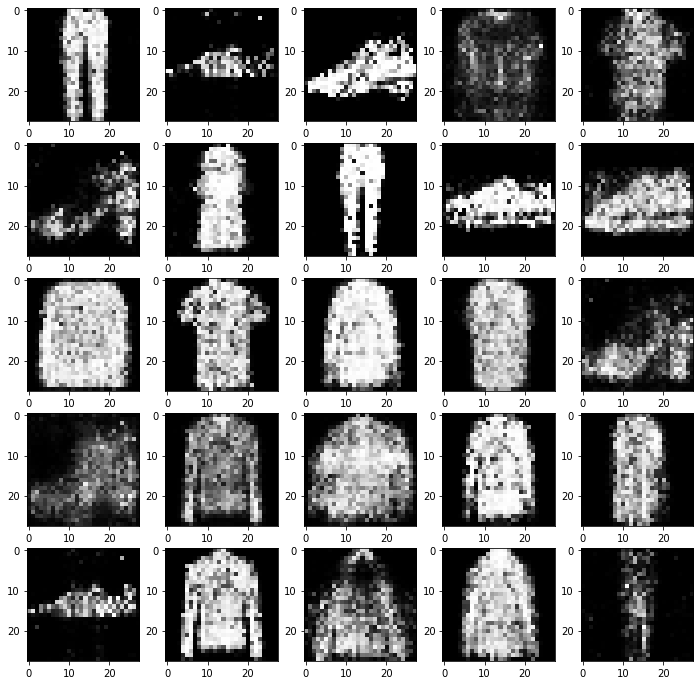

ep :  25


100%|██████████| 273/273 [00:19<00:00, 14.27it/s]


losses ->  0.6649341583251953   0.7609522938728333


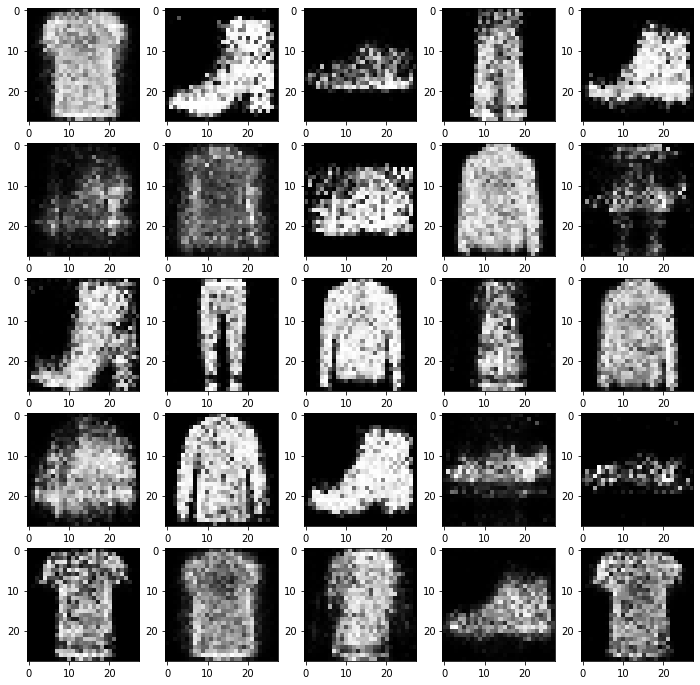

ep :  26


100%|██████████| 273/273 [00:18<00:00, 14.85it/s]


losses ->  0.6516956686973572   0.7612013220787048


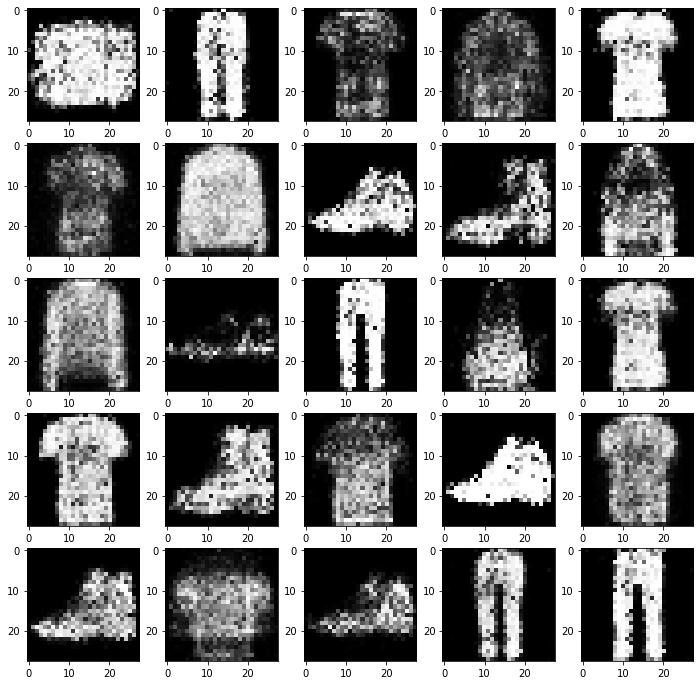

ep :  27


100%|██████████| 273/273 [00:18<00:00, 14.67it/s]


losses ->  0.6928791403770447   0.7551417946815491


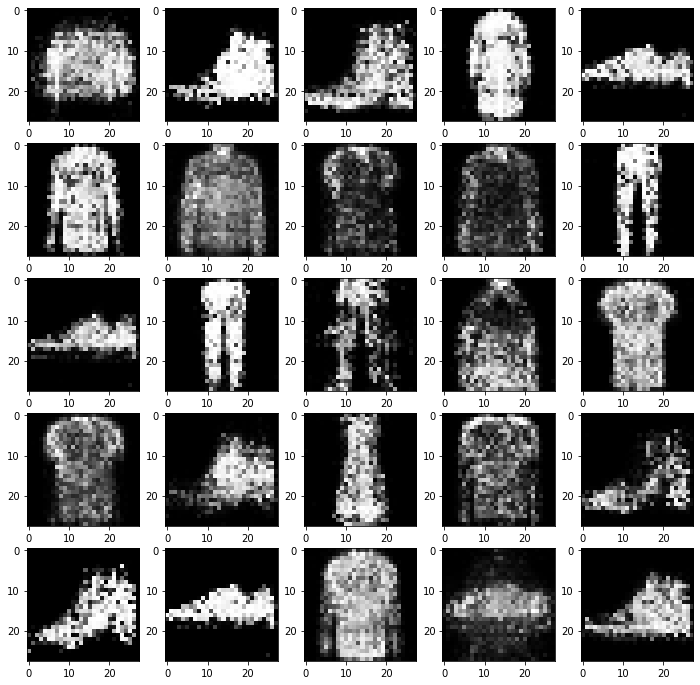

ep :  28


100%|██████████| 273/273 [00:18<00:00, 14.71it/s]


losses ->  0.6943165063858032   0.7654849886894226


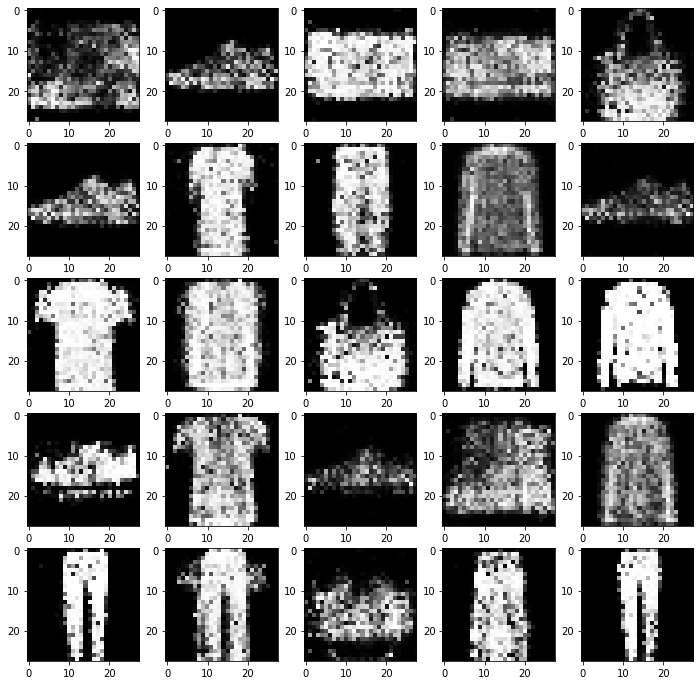

ep :  29


100%|██████████| 273/273 [00:18<00:00, 14.57it/s]


losses ->  0.6628400087356567   0.7618228197097778


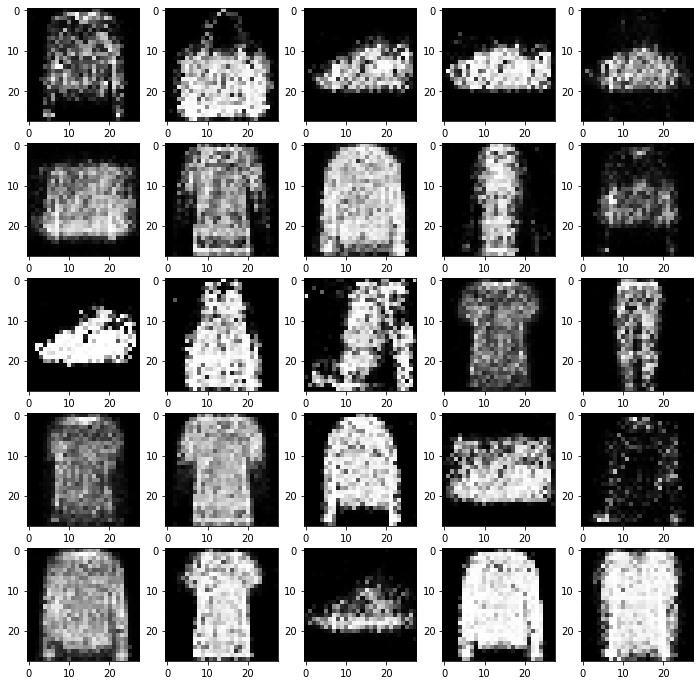

ep :  30


100%|██████████| 273/273 [00:19<00:00, 14.08it/s]


losses ->  0.6787022352218628   0.7420930862426758


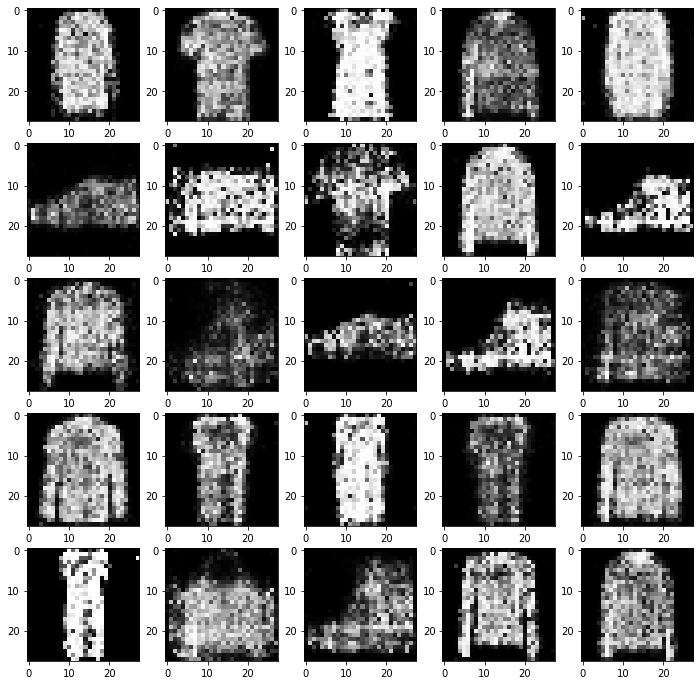

ep :  31


100%|██████████| 273/273 [00:18<00:00, 14.81it/s]


losses ->  0.6780067682266235   0.7786797285079956


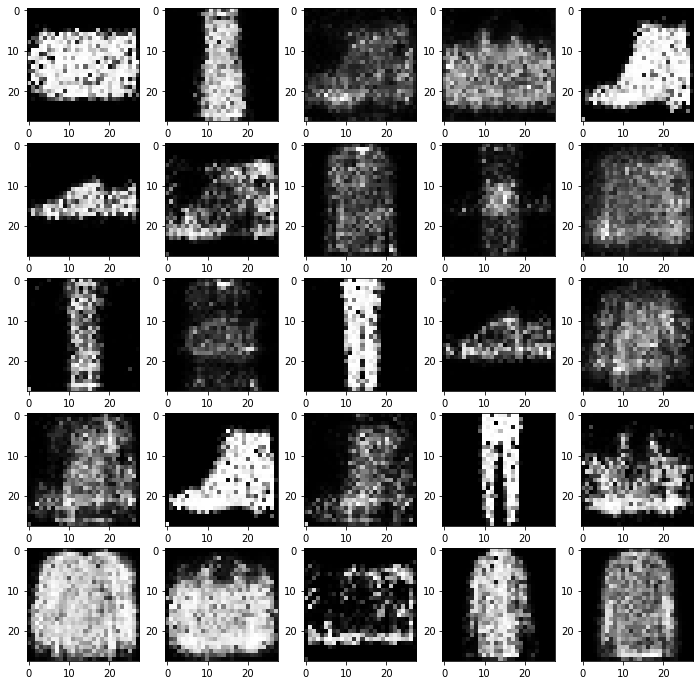

ep :  32


100%|██████████| 273/273 [00:18<00:00, 14.51it/s]


losses ->  0.6756352186203003   0.7556112408638


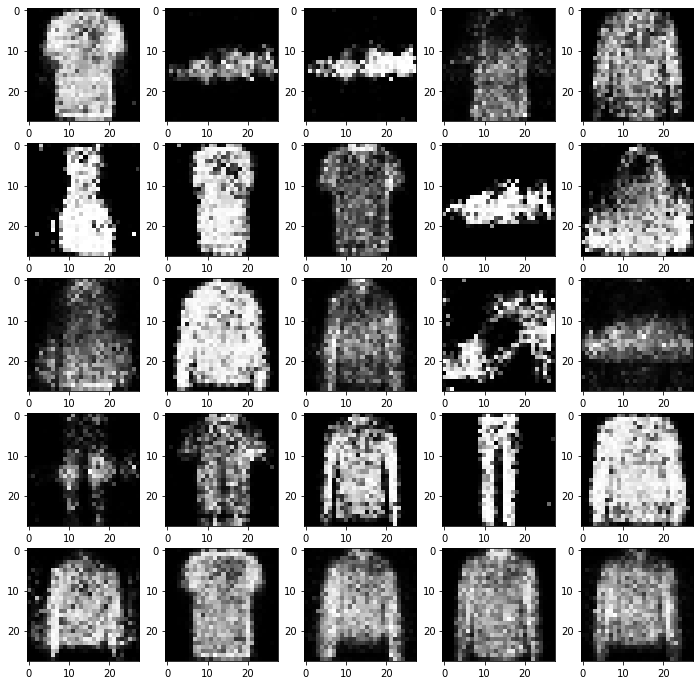

ep :  33


100%|██████████| 273/273 [00:18<00:00, 14.60it/s]


losses ->  0.6891844272613525   0.7940648794174194


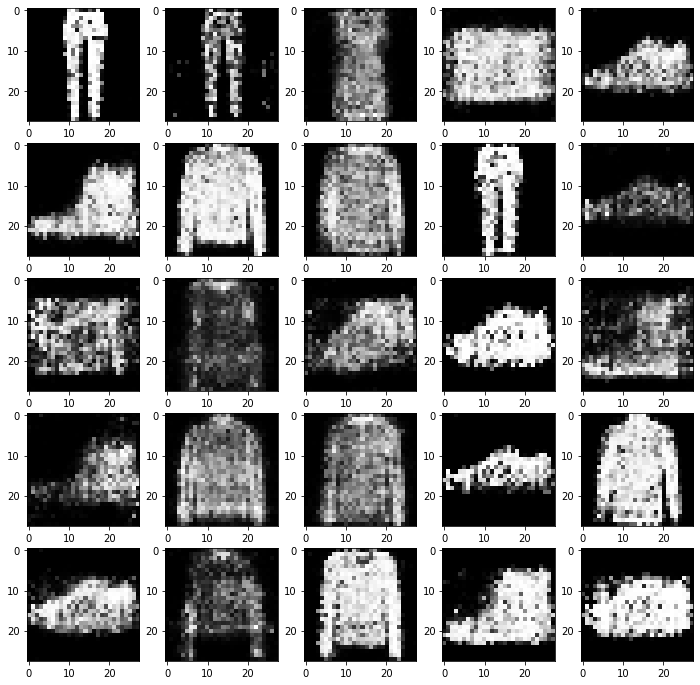

ep :  34


100%|██████████| 273/273 [00:18<00:00, 14.40it/s]


losses ->  0.6781256794929504   0.7235116362571716


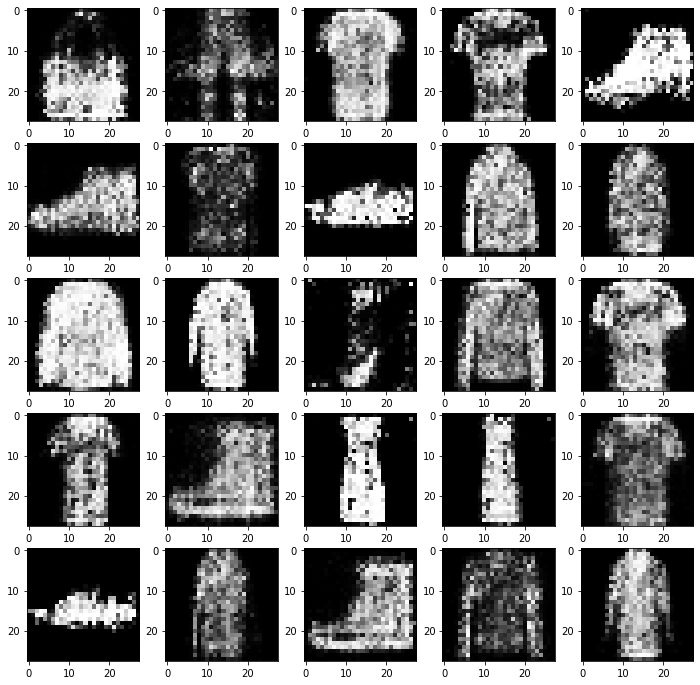

ep :  35


100%|██████████| 273/273 [00:19<00:00, 14.19it/s]


losses ->  0.6869819164276123   0.7347391247749329


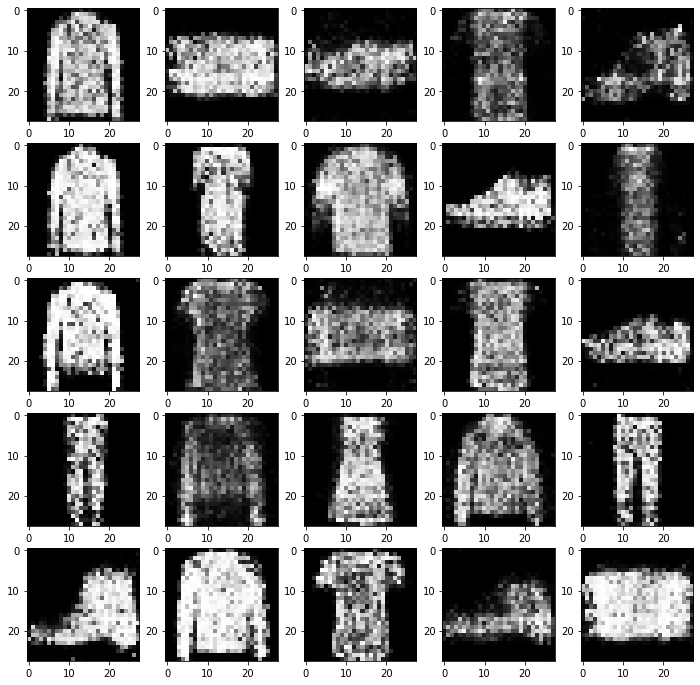

ep :  36


100%|██████████| 273/273 [00:19<00:00, 14.37it/s]


losses ->  0.6842454075813293   0.7296686172485352


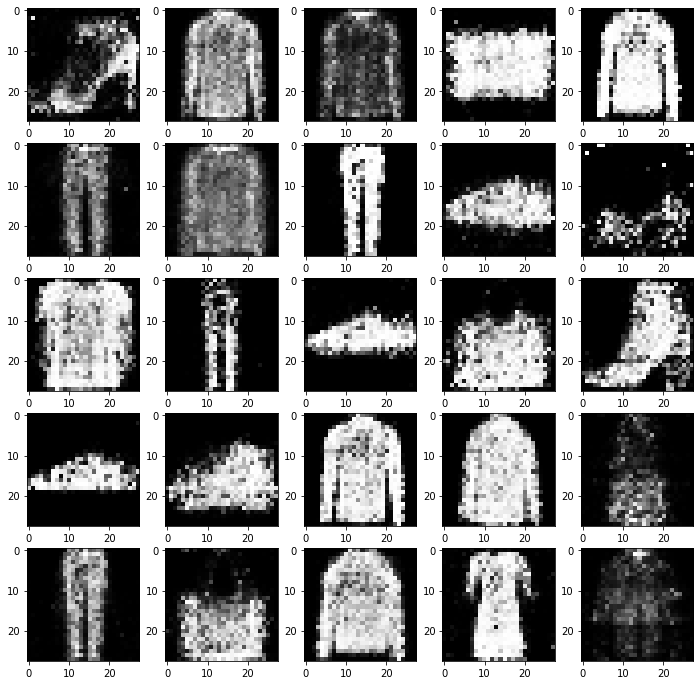

ep :  37


100%|██████████| 273/273 [00:18<00:00, 14.43it/s]


losses ->  0.6873626708984375   0.7413873076438904


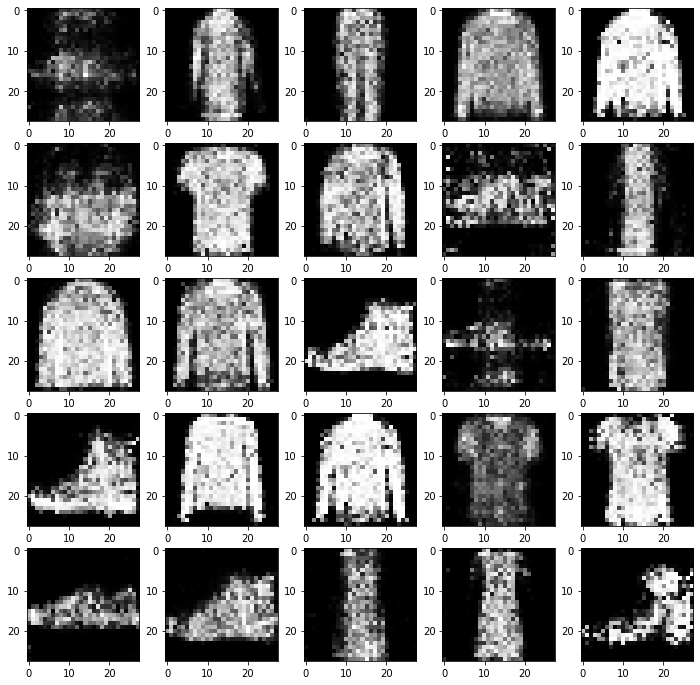

ep :  38


100%|██████████| 273/273 [00:19<00:00, 14.30it/s]


losses ->  0.693101167678833   0.710795521736145


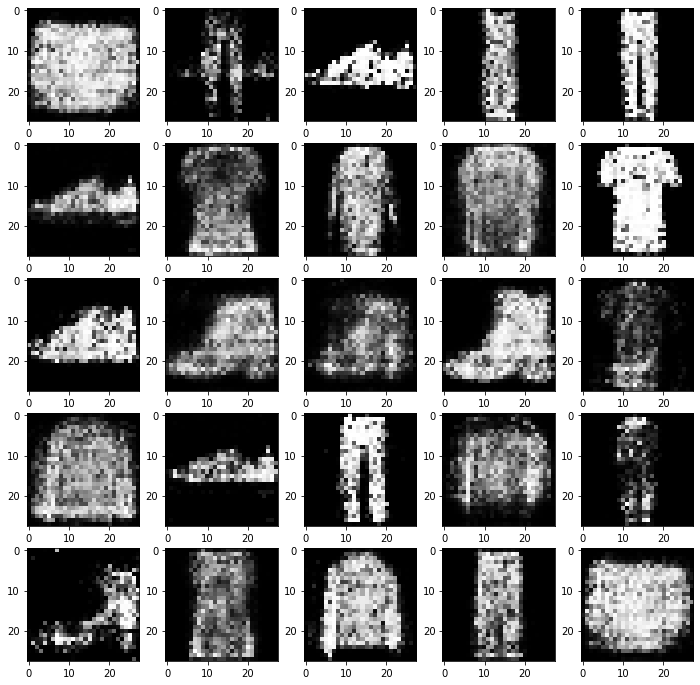

ep :  39


100%|██████████| 273/273 [00:19<00:00, 13.94it/s]


losses ->  0.6811189651489258   0.7309423089027405


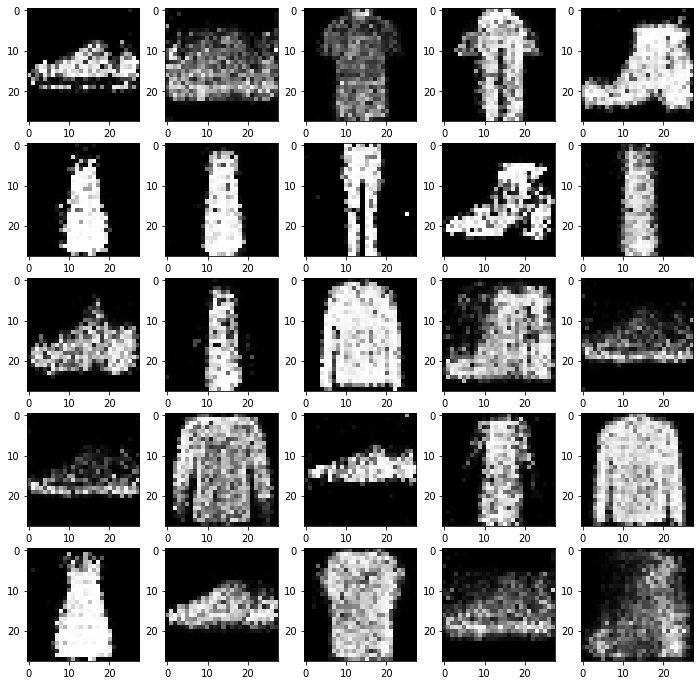

ep :  40


100%|██████████| 273/273 [00:18<00:00, 14.43it/s]


losses ->  0.6823278665542603   0.715061604976654


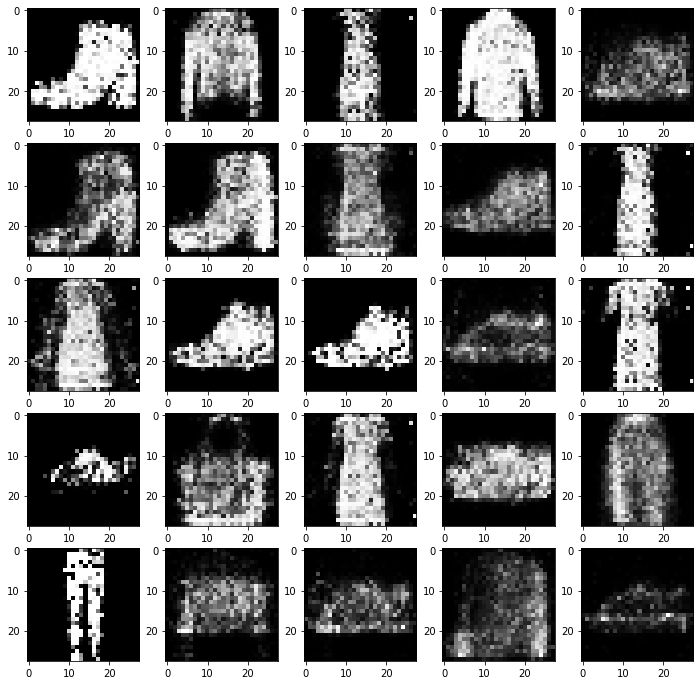

ep :  41


100%|██████████| 273/273 [00:19<00:00, 14.23it/s]


losses ->  0.6879279613494873   0.7299423813819885


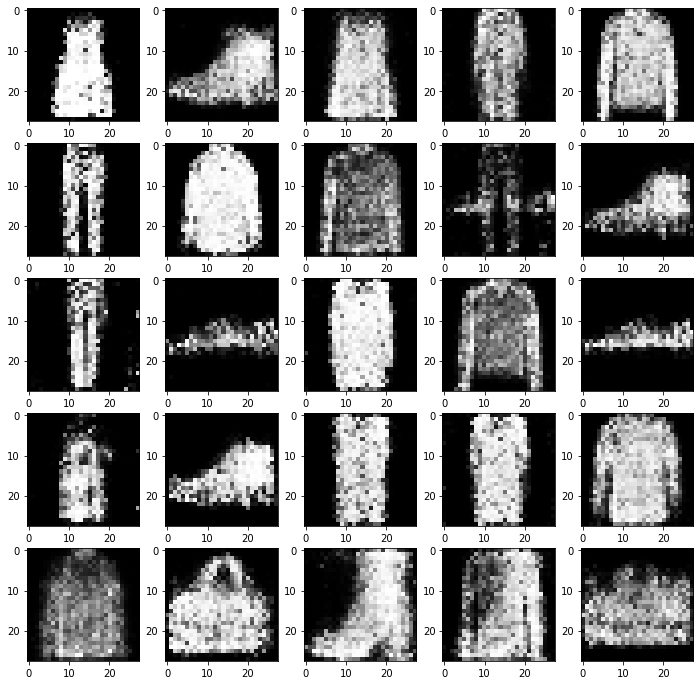

ep :  42


100%|██████████| 273/273 [00:19<00:00, 14.34it/s]


losses ->  0.6961448192596436   0.7185734510421753


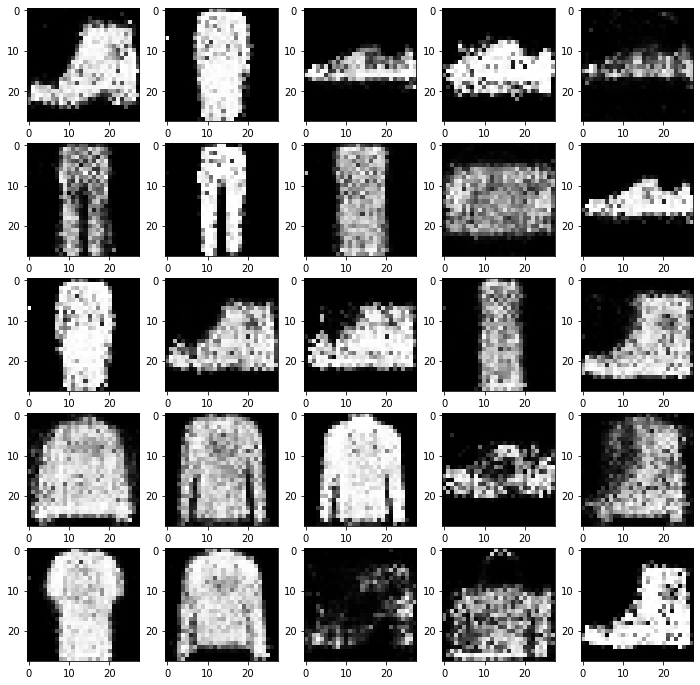

ep :  43


100%|██████████| 273/273 [00:19<00:00, 14.08it/s]


losses ->  0.6827682256698608   0.7230575680732727


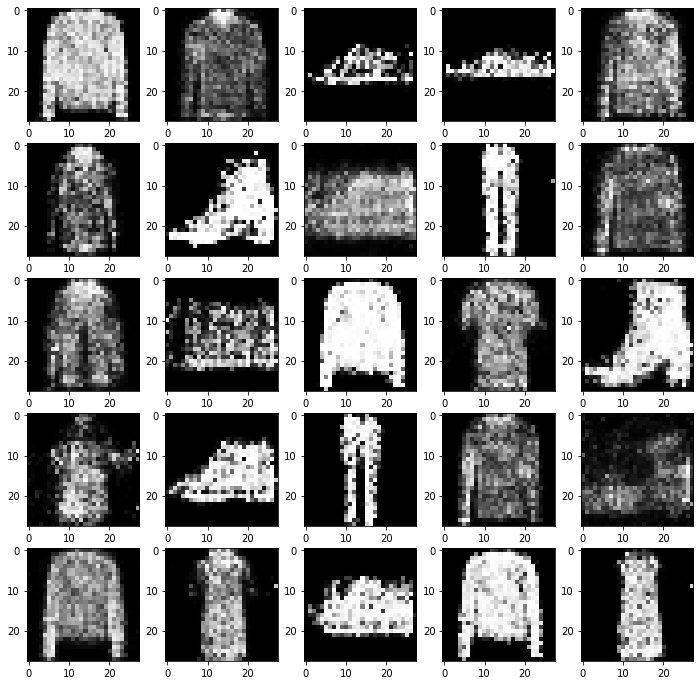

ep :  44


100%|██████████| 273/273 [00:19<00:00, 13.88it/s]


losses ->  0.6957788467407227   0.709535539150238


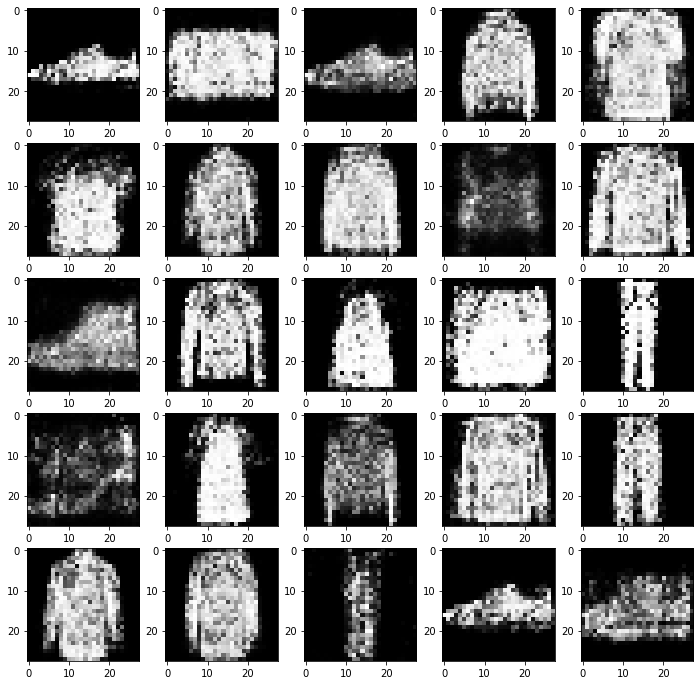

ep :  45


100%|██████████| 273/273 [00:19<00:00, 14.17it/s]


losses ->  0.6803504824638367   0.7309828400611877


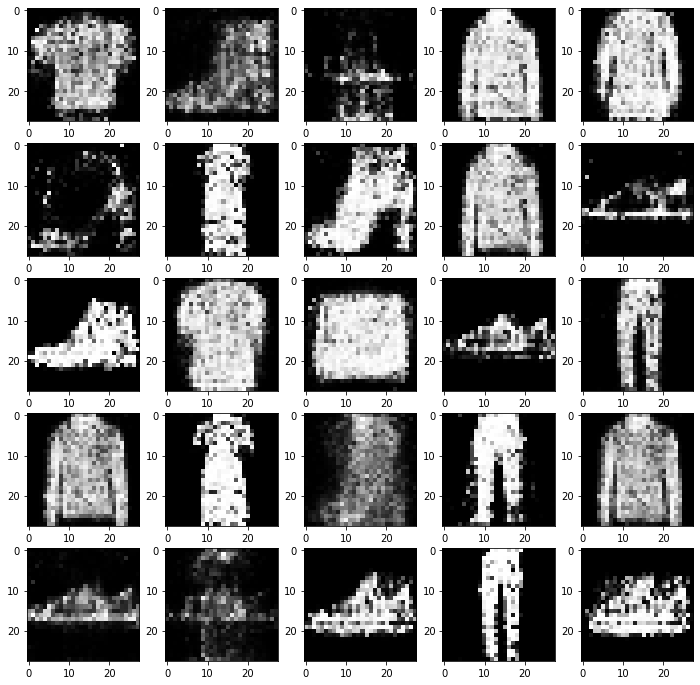

ep :  46


100%|██████████| 273/273 [00:19<00:00, 14.09it/s]


losses ->  0.6895159482955933   0.703965425491333


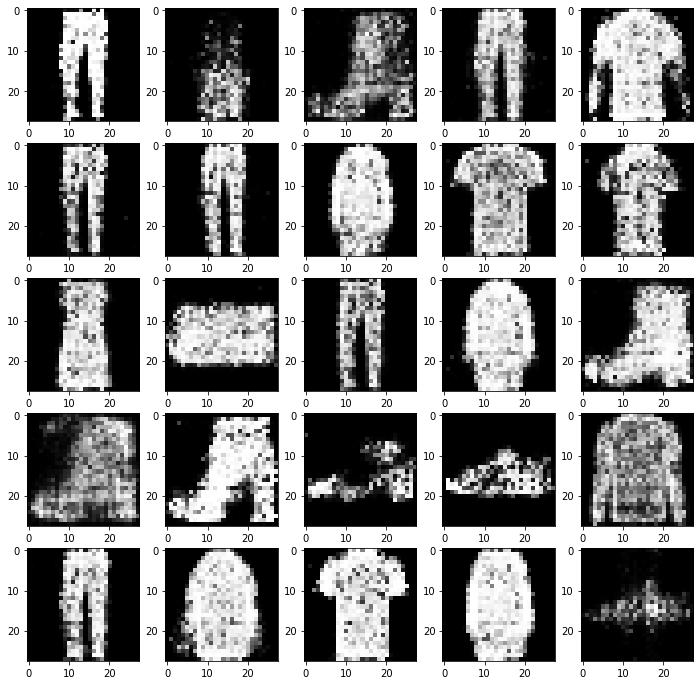

ep :  47


100%|██████████| 273/273 [00:19<00:00, 14.27it/s]


losses ->  0.6832849383354187   0.7004163265228271


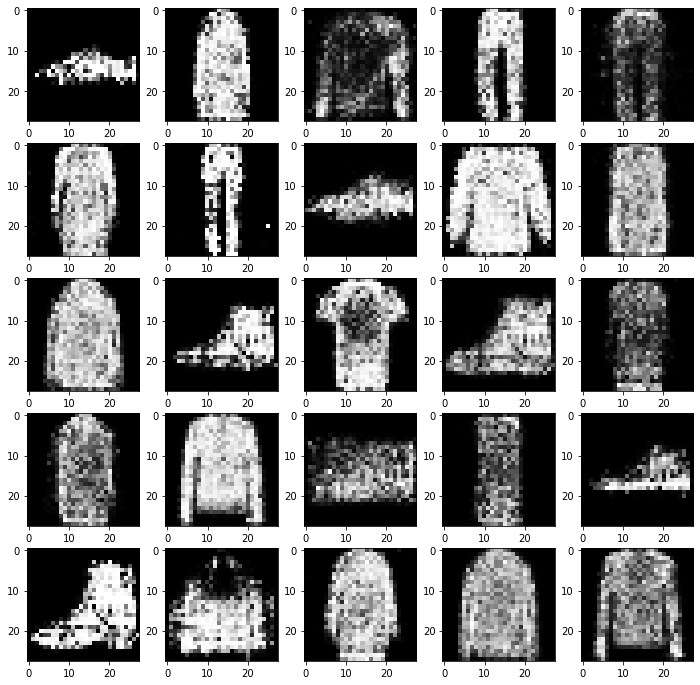

ep :  48


100%|██████████| 273/273 [00:19<00:00, 14.12it/s]


losses ->  0.6883355379104614   0.7275635600090027


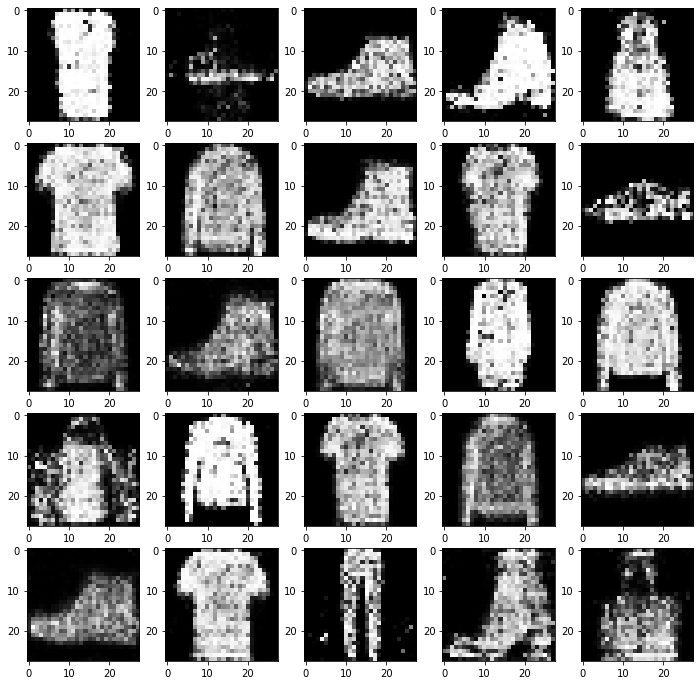

ep :  49


100%|██████████| 273/273 [00:19<00:00, 14.12it/s]


losses ->  0.6924247145652771   0.7199245095252991


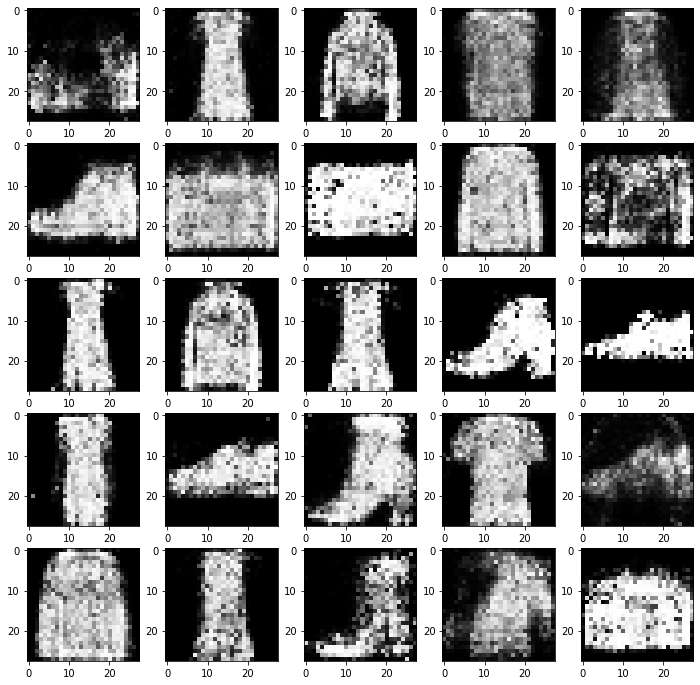

ep :  50


100%|██████████| 273/273 [00:19<00:00, 13.87it/s]


losses ->  0.7029208540916443   0.724503755569458


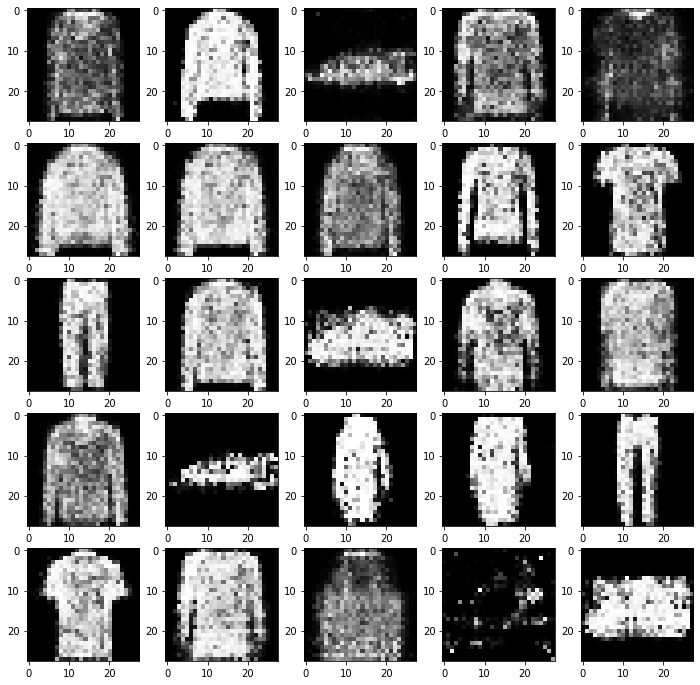

ep :  51


100%|██████████| 273/273 [00:19<00:00, 14.18it/s]


losses ->  0.68524169921875   0.6880801916122437


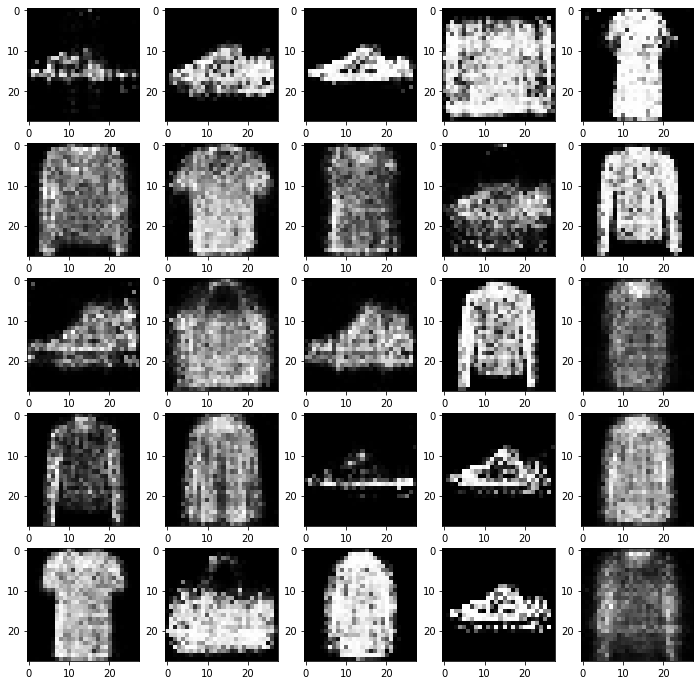

ep :  52


100%|██████████| 273/273 [00:19<00:00, 14.17it/s]


losses ->  0.6934523582458496   0.7054907083511353


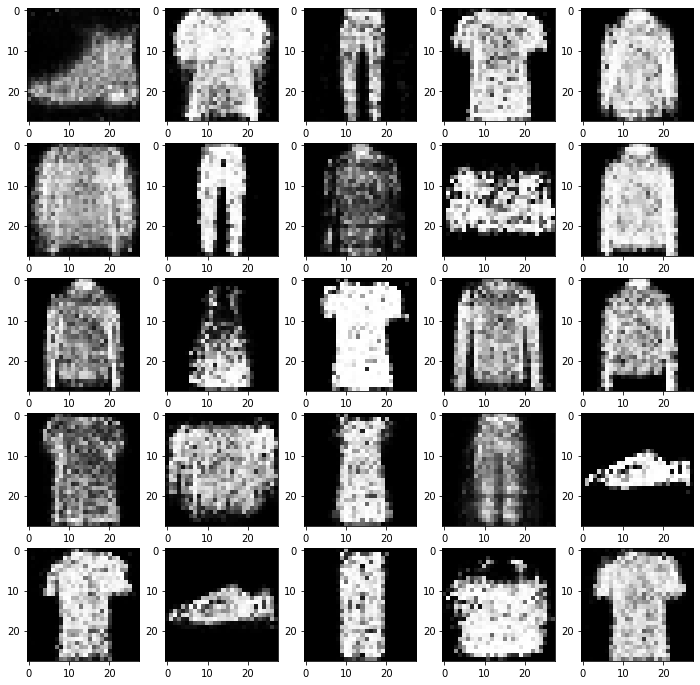

ep :  53


100%|██████████| 273/273 [00:20<00:00, 13.43it/s]


losses ->  0.6933252811431885   0.7348446846008301


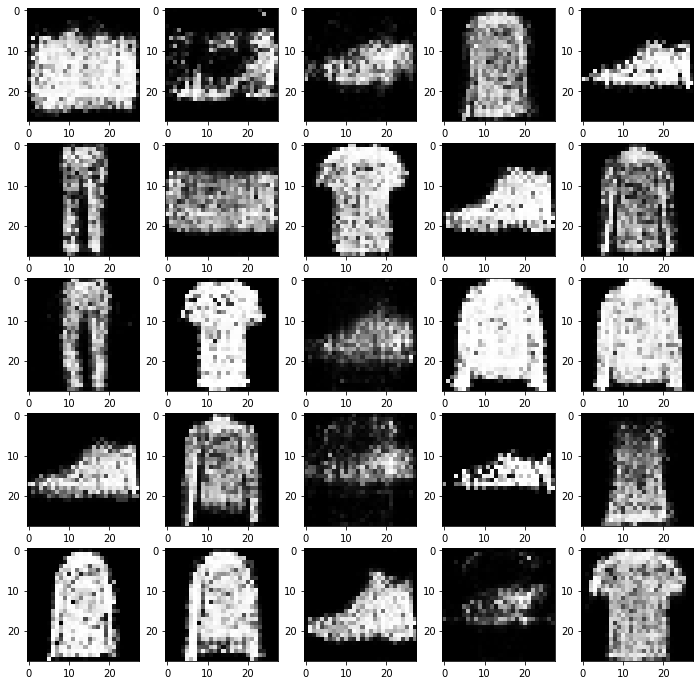

ep :  54


100%|██████████| 273/273 [00:19<00:00, 14.25it/s]


losses ->  0.6915236115455627   0.7099909782409668


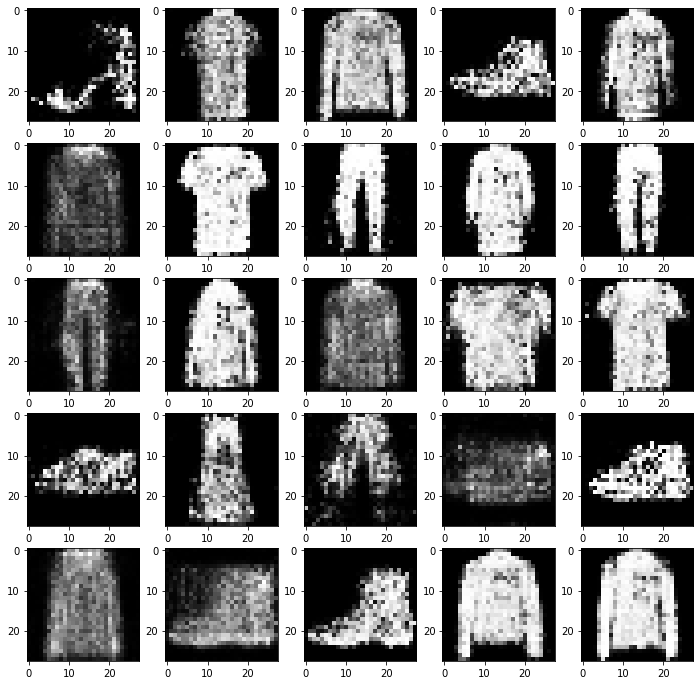

ep :  55


100%|██████████| 273/273 [00:19<00:00, 13.96it/s]


losses ->  0.6905621886253357   0.7147525548934937


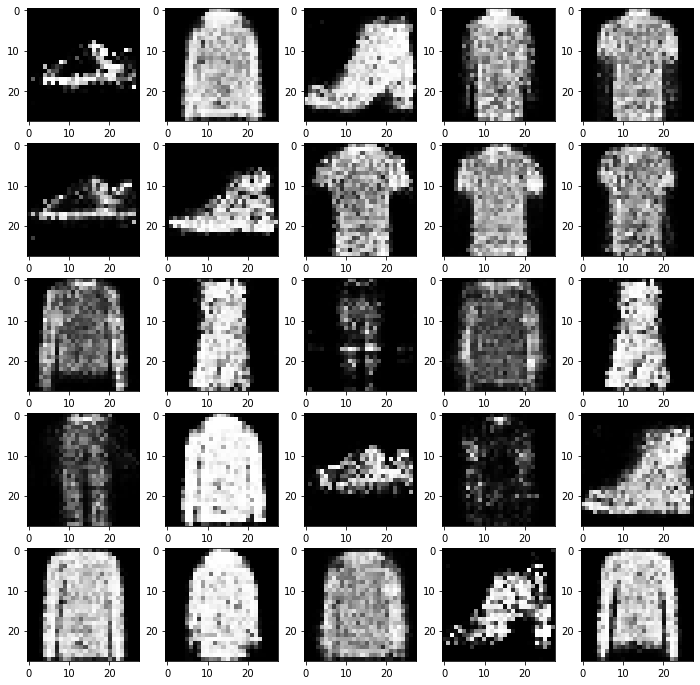

ep :  56


100%|██████████| 273/273 [00:19<00:00, 13.82it/s]


losses ->  0.6768133044242859   0.688835620880127


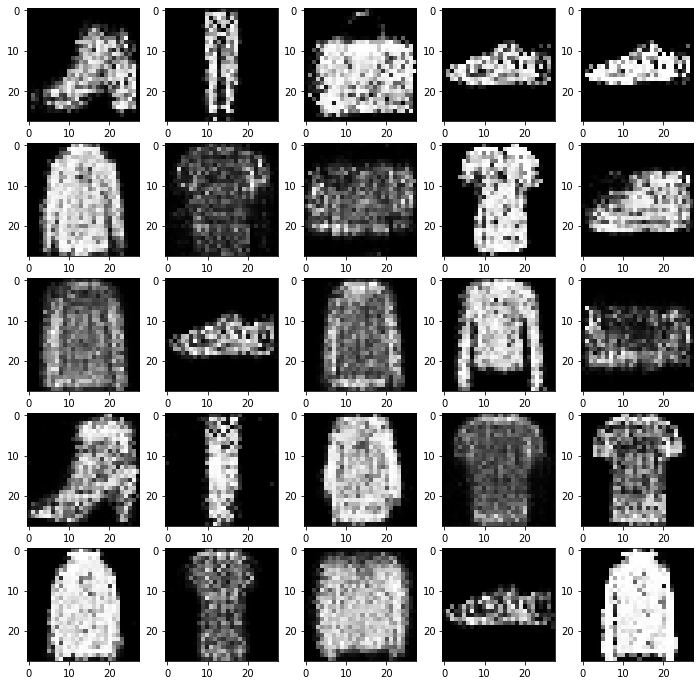

ep :  57


100%|██████████| 273/273 [00:19<00:00, 14.11it/s]


losses ->  0.6901494264602661   0.7150397300720215


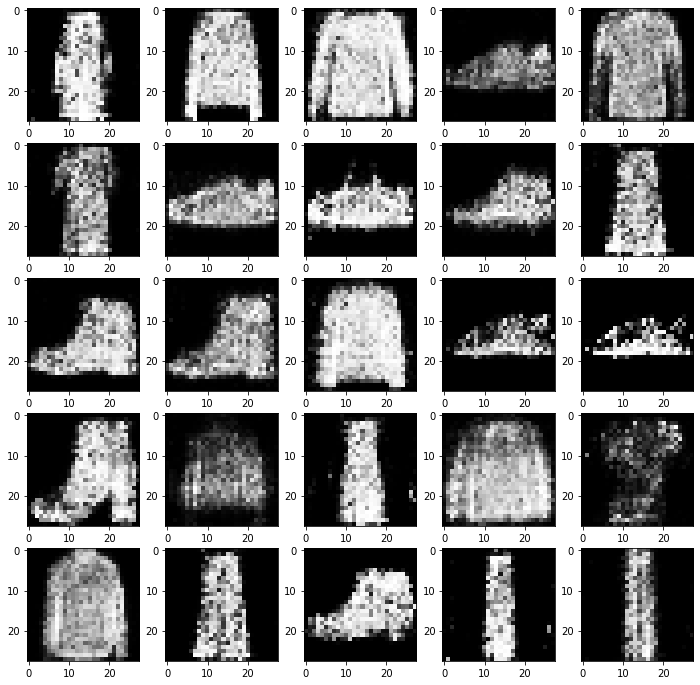

ep :  58


100%|██████████| 273/273 [00:19<00:00, 13.97it/s]


losses ->  0.6868289709091187   0.7088841795921326


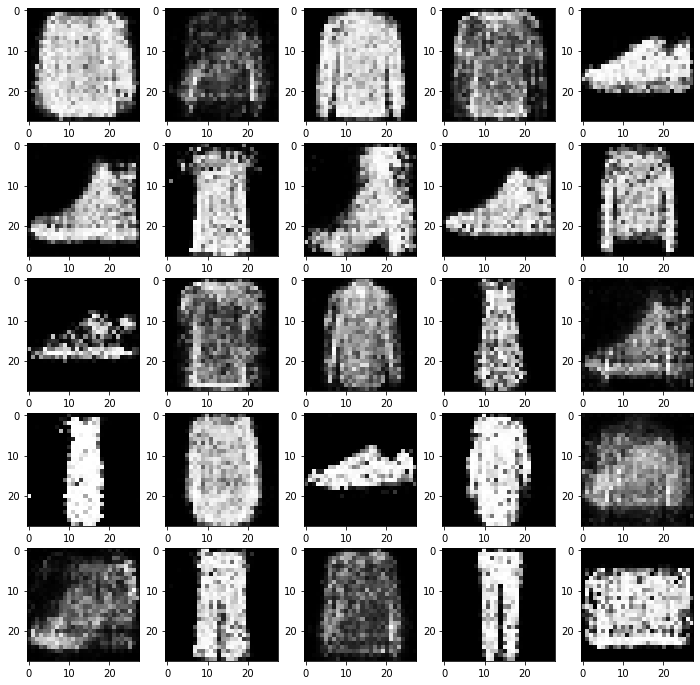

ep :  59


100%|██████████| 273/273 [00:19<00:00, 13.97it/s]


losses ->  0.6838608980178833   0.7238690257072449


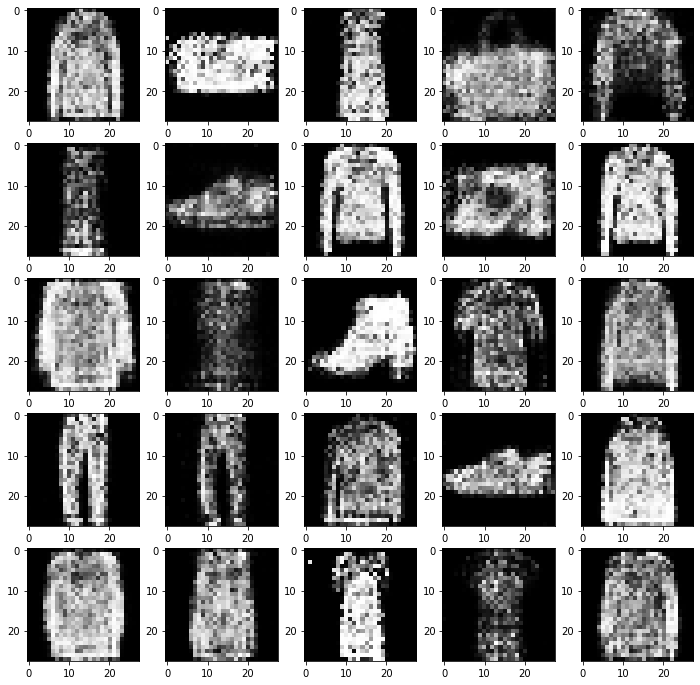

ep :  60


100%|██████████| 273/273 [00:19<00:00, 13.84it/s]


losses ->  0.693126380443573   0.7226812839508057


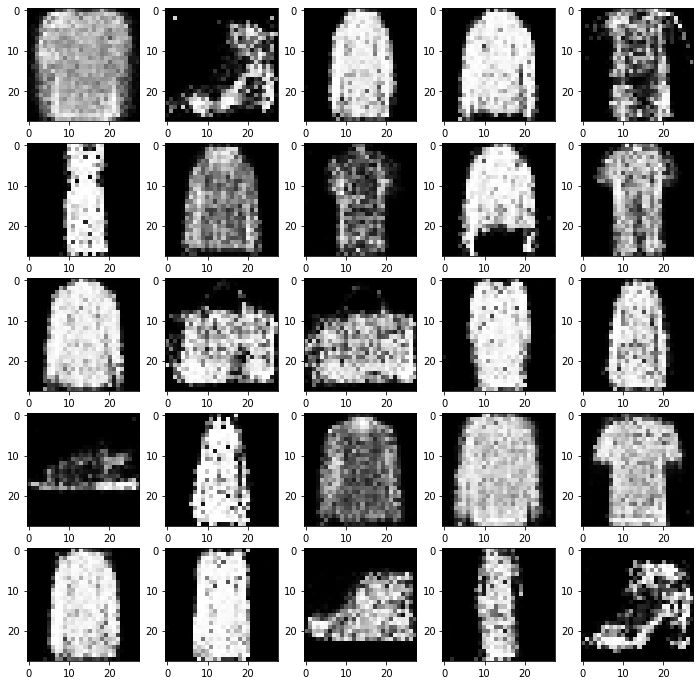

ep :  61


100%|██████████| 273/273 [00:19<00:00, 14.07it/s]


losses ->  0.7009817957878113   0.7067155241966248


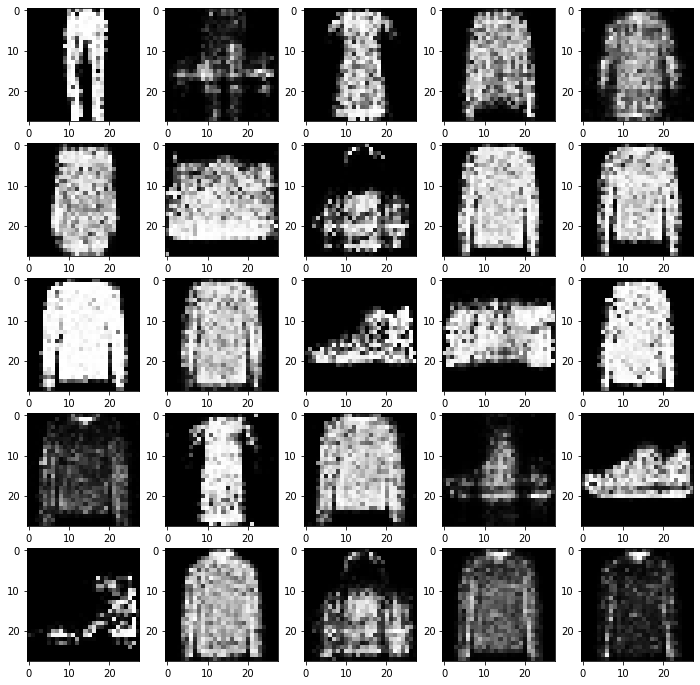

ep :  62


100%|██████████| 273/273 [00:20<00:00, 13.51it/s]


losses ->  0.6856717467308044   0.6901451349258423


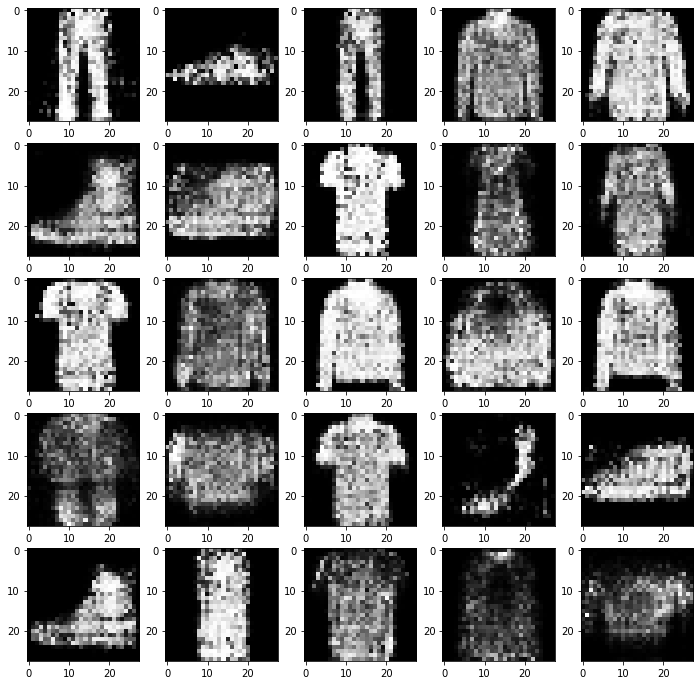

ep :  63


100%|██████████| 273/273 [00:19<00:00, 13.78it/s]


losses ->  0.698135256767273   0.6964112520217896


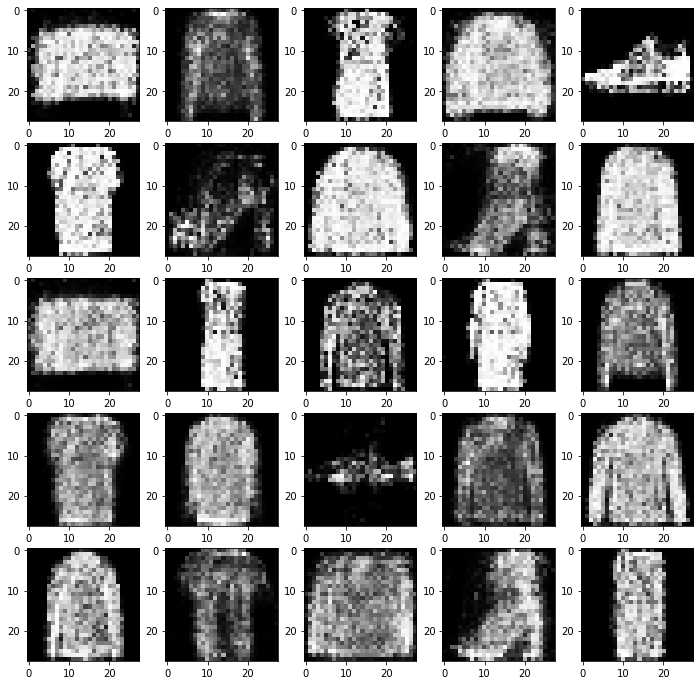

ep :  64


100%|██████████| 273/273 [00:19<00:00, 13.86it/s]


losses ->  0.6837010383605957   0.7131510972976685


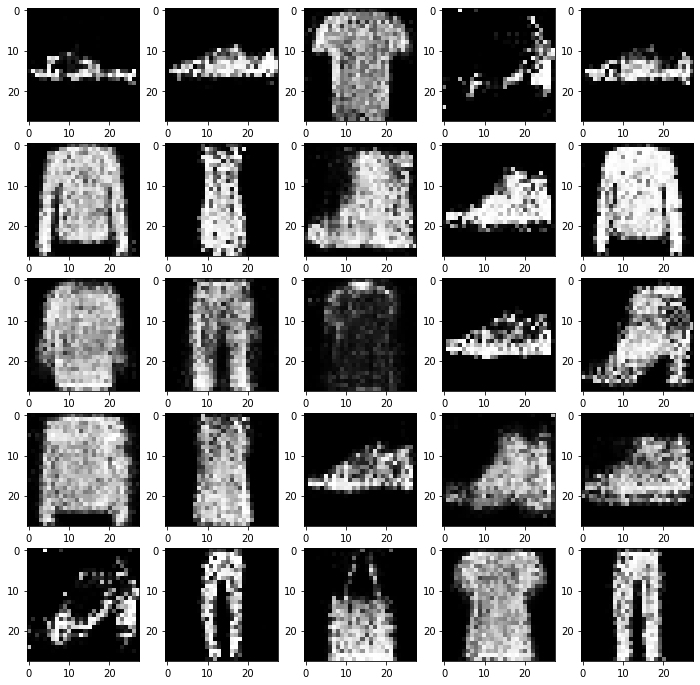

ep :  65


100%|██████████| 273/273 [00:19<00:00, 13.77it/s]


losses ->  0.6887142658233643   0.6882220506668091


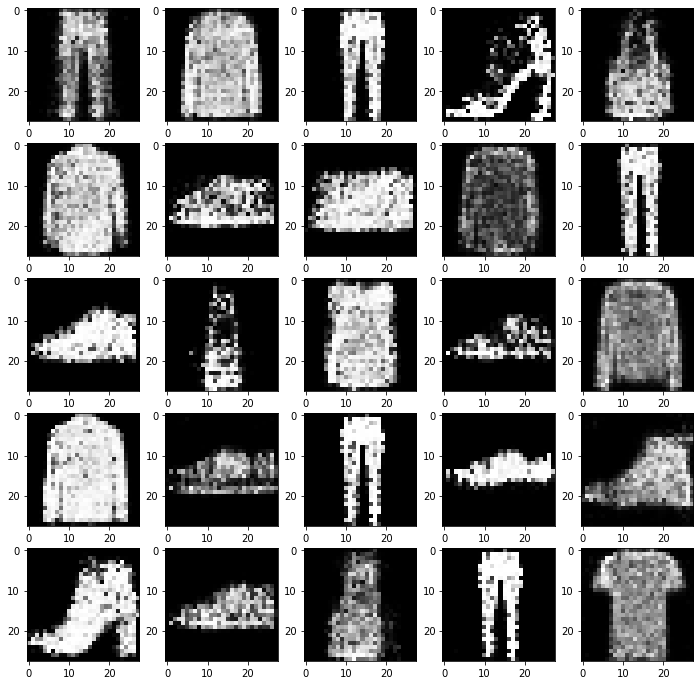

ep :  66


100%|██████████| 273/273 [00:20<00:00, 13.23it/s]


losses ->  0.6900339722633362   0.693107008934021


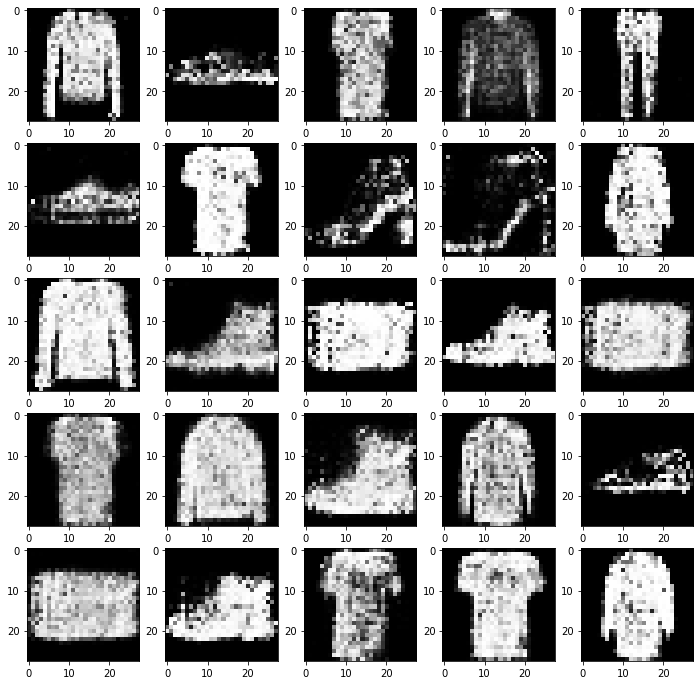

ep :  67


100%|██████████| 273/273 [00:19<00:00, 13.83it/s]


losses ->  0.6907410025596619   0.7176065444946289


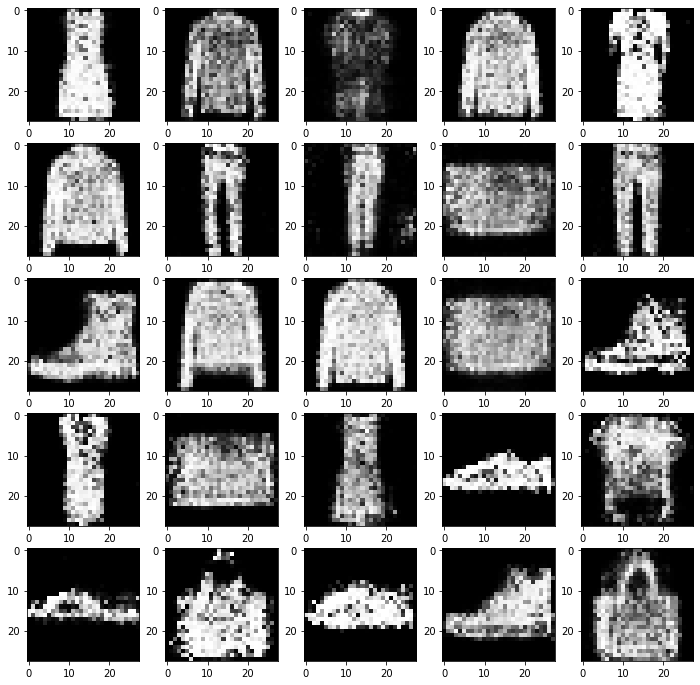

ep :  68


100%|██████████| 273/273 [00:19<00:00, 13.77it/s]


losses ->  0.6875568628311157   0.7296258211135864


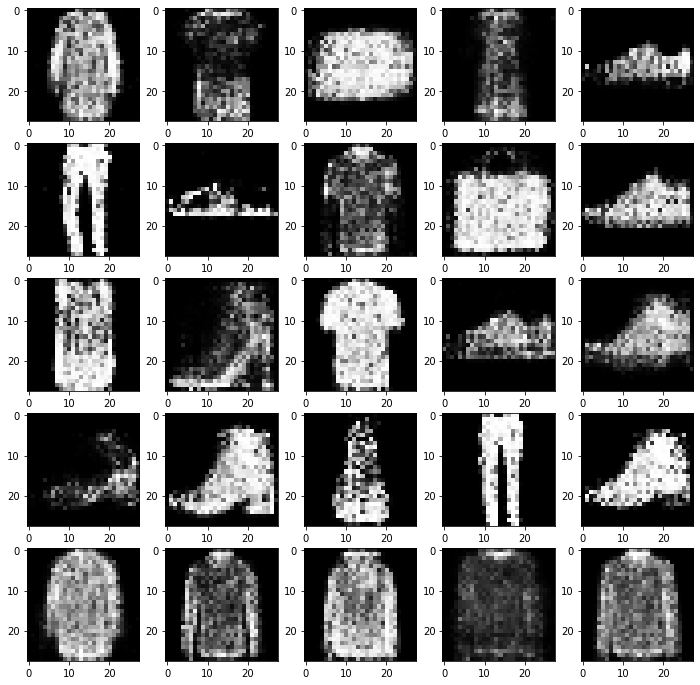

ep :  69


100%|██████████| 273/273 [00:19<00:00, 13.77it/s]


losses ->  0.6998907327651978   0.7317224144935608


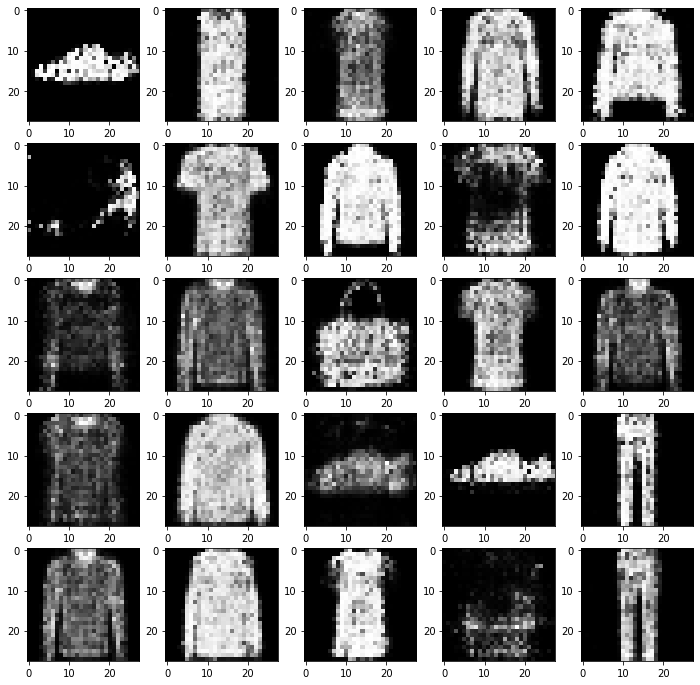

ep :  70


100%|██████████| 273/273 [00:19<00:00, 13.75it/s]


losses ->  0.690986692905426   0.723809003829956


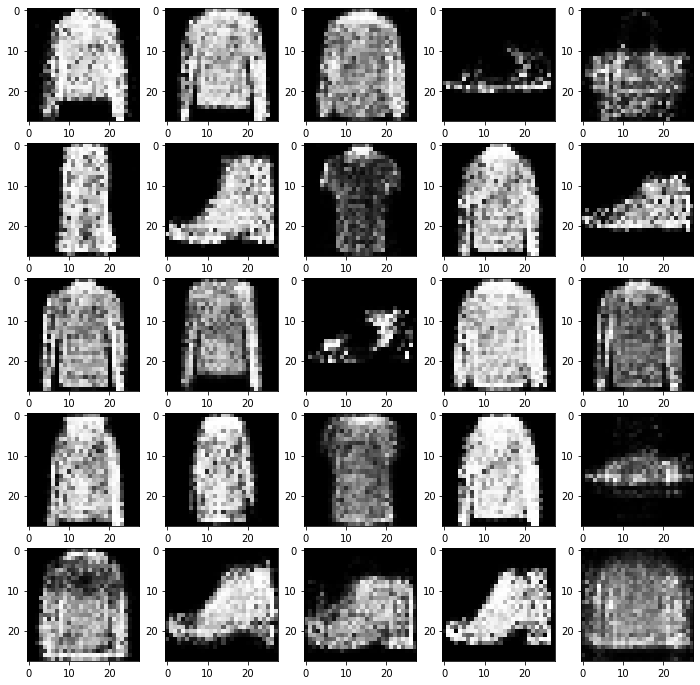

ep :  71


100%|██████████| 273/273 [00:20<00:00, 13.25it/s]


losses ->  0.6903864145278931   0.7342221140861511


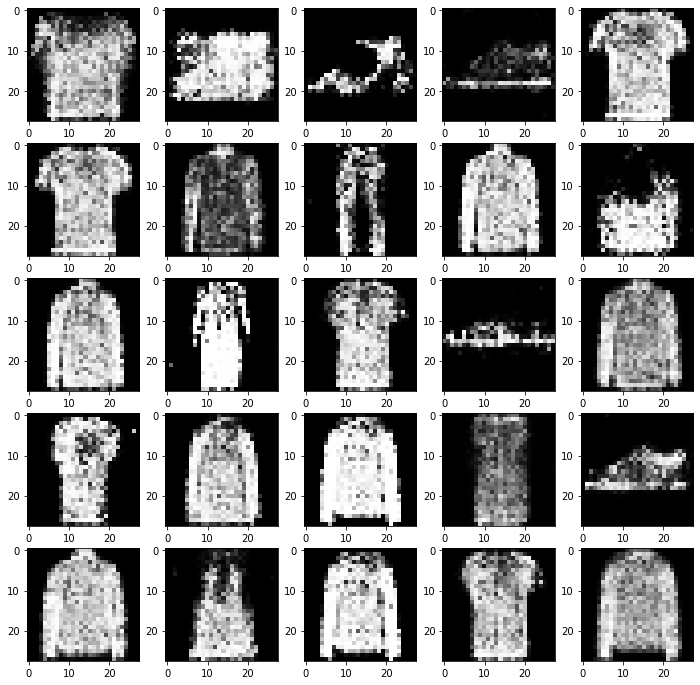

ep :  72


100%|██████████| 273/273 [00:19<00:00, 13.72it/s]


losses ->  0.6794920563697815   0.7584652900695801


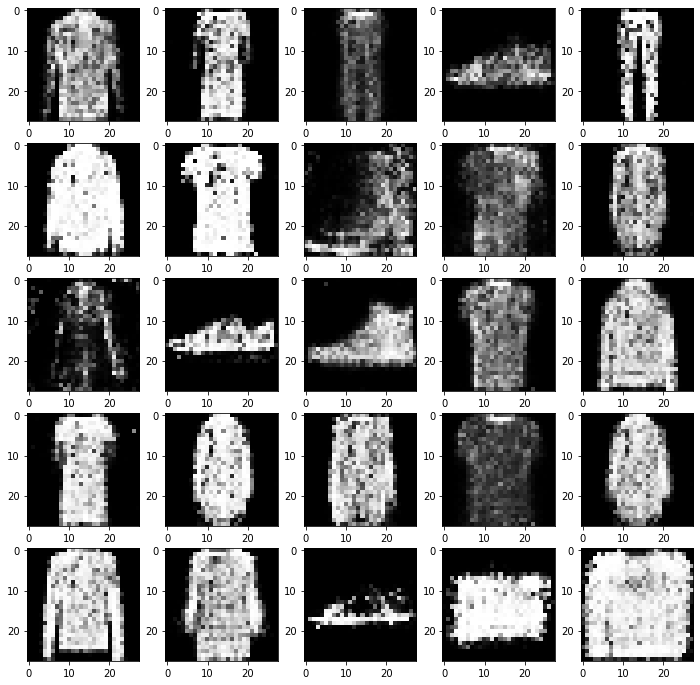

ep :  73


100%|██████████| 273/273 [00:20<00:00, 13.49it/s]


losses ->  0.6962957382202148   0.7072998285293579


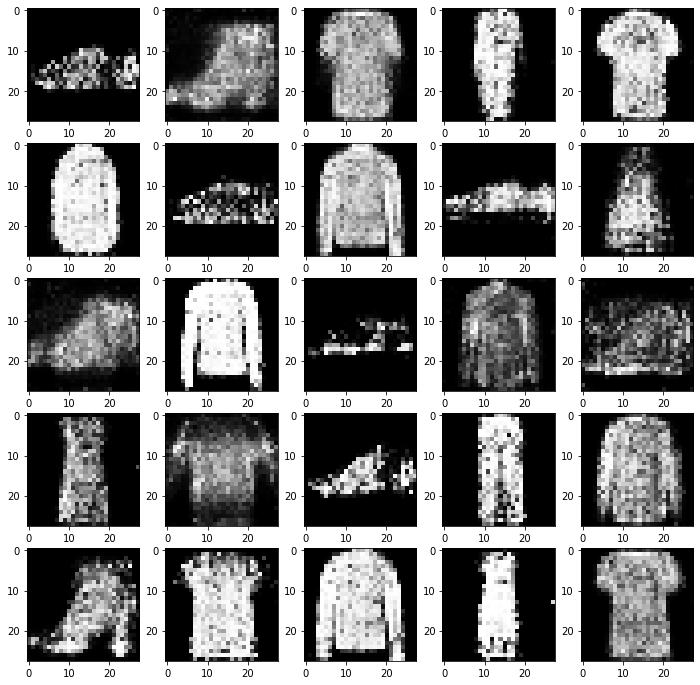

ep :  74


100%|██████████| 273/273 [00:19<00:00, 13.65it/s]


losses ->  0.687811017036438   0.7240495681762695


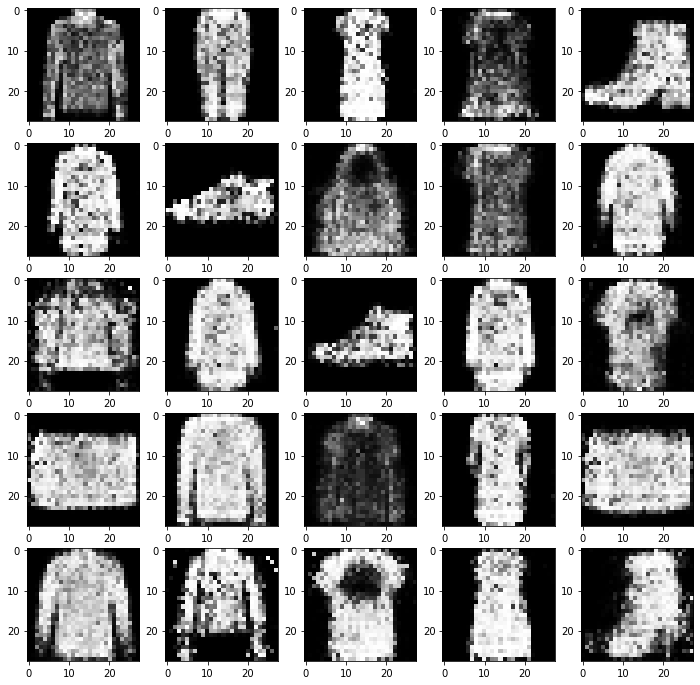

ep :  75


100%|██████████| 273/273 [00:20<00:00, 13.32it/s]


losses ->  0.6910234689712524   0.7105085253715515


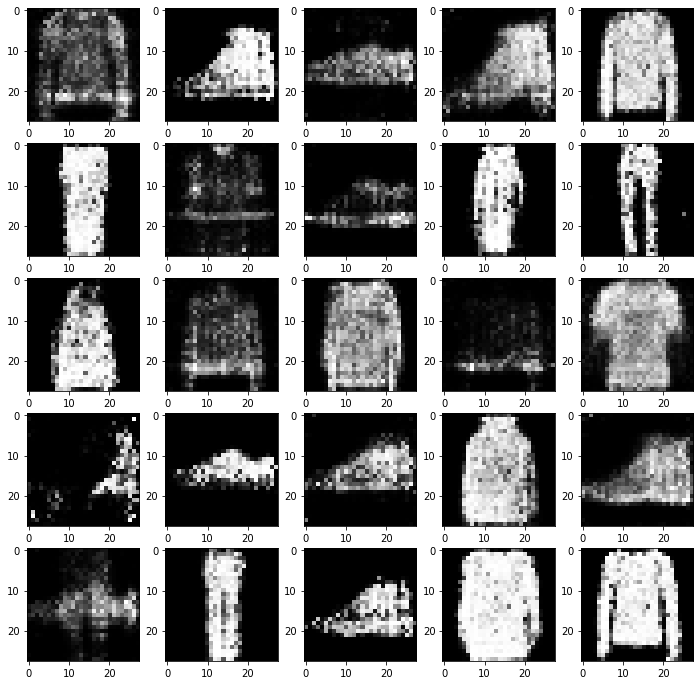

ep :  76


100%|██████████| 273/273 [00:20<00:00, 13.59it/s]


losses ->  0.6987957954406738   0.7186367511749268


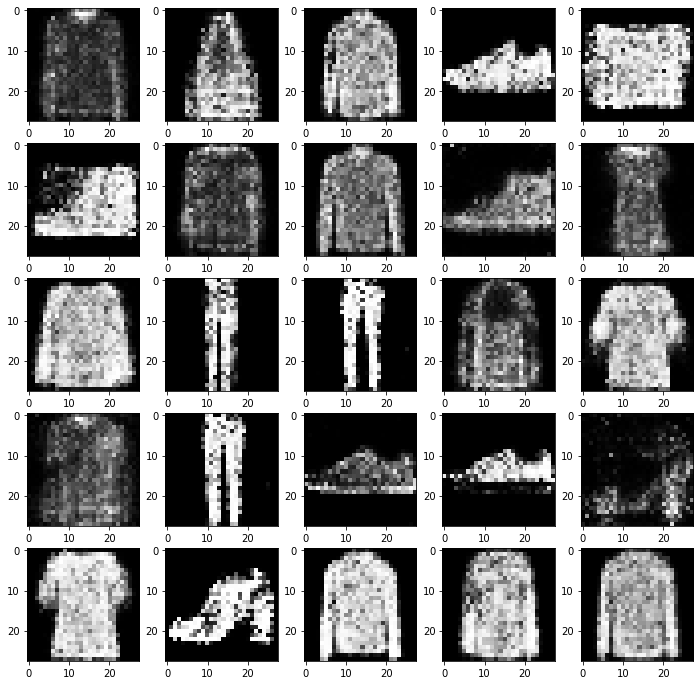

ep :  77


100%|██████████| 273/273 [00:19<00:00, 13.69it/s]


losses ->  0.691554844379425   0.6930626630783081


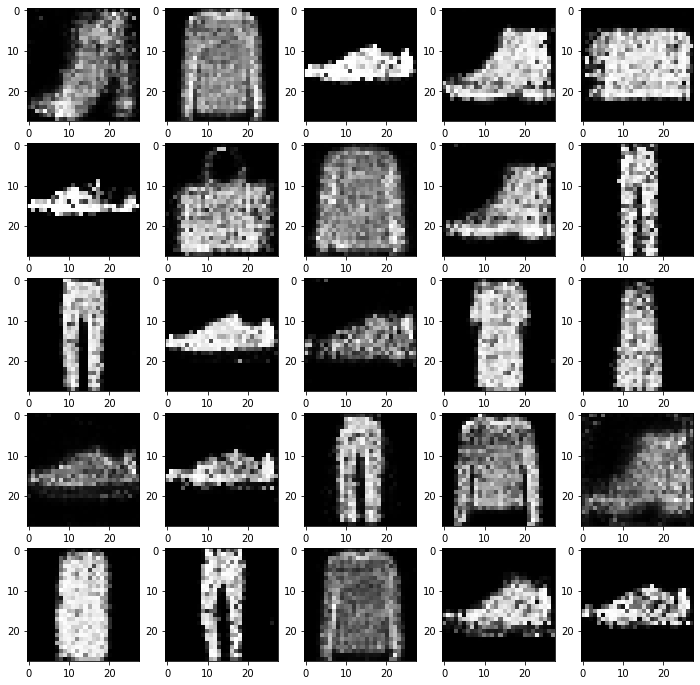

ep :  78


100%|██████████| 273/273 [00:20<00:00, 13.61it/s]


losses ->  0.6977803111076355   0.6833361387252808


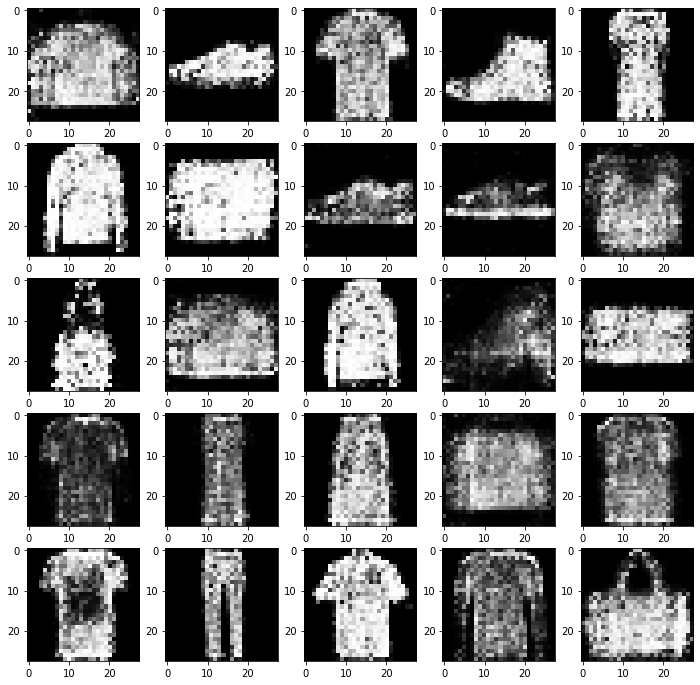

ep :  79


100%|██████████| 273/273 [00:20<00:00, 13.05it/s]


losses ->  0.6915509700775146   0.7324086427688599


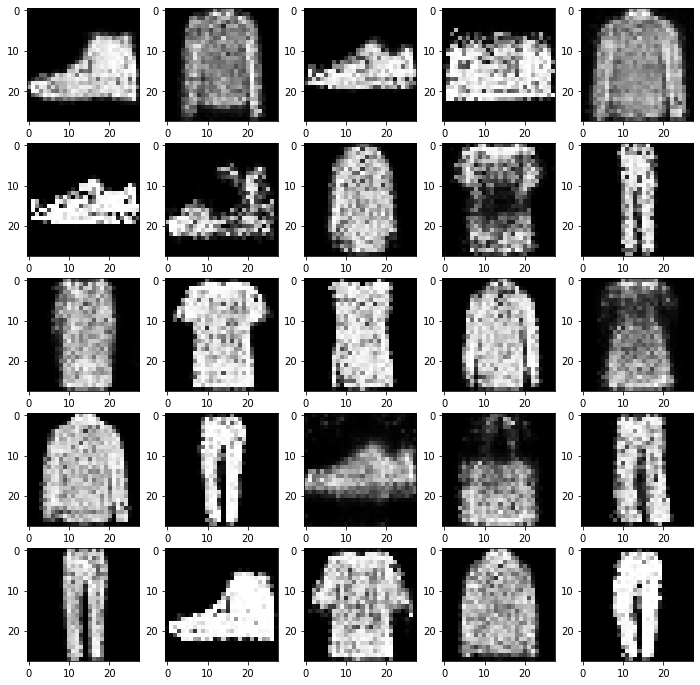

ep :  80


100%|██████████| 273/273 [00:20<00:00, 13.51it/s]


losses ->  0.6920744776725769   0.6906444430351257


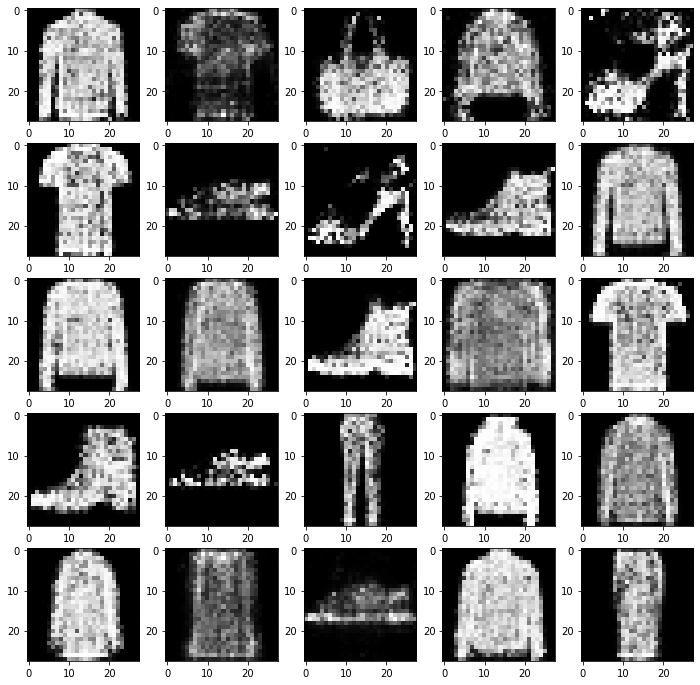

ep :  81


100%|██████████| 273/273 [00:19<00:00, 13.67it/s]


losses ->  0.6972988247871399   0.744340181350708


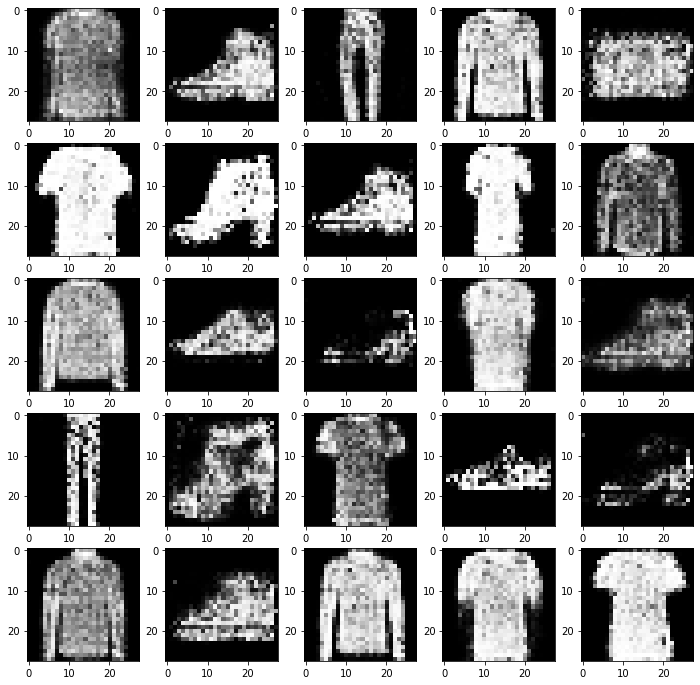

ep :  82


100%|██████████| 273/273 [00:20<00:00, 13.62it/s]


losses ->  0.6946988701820374   0.684173047542572


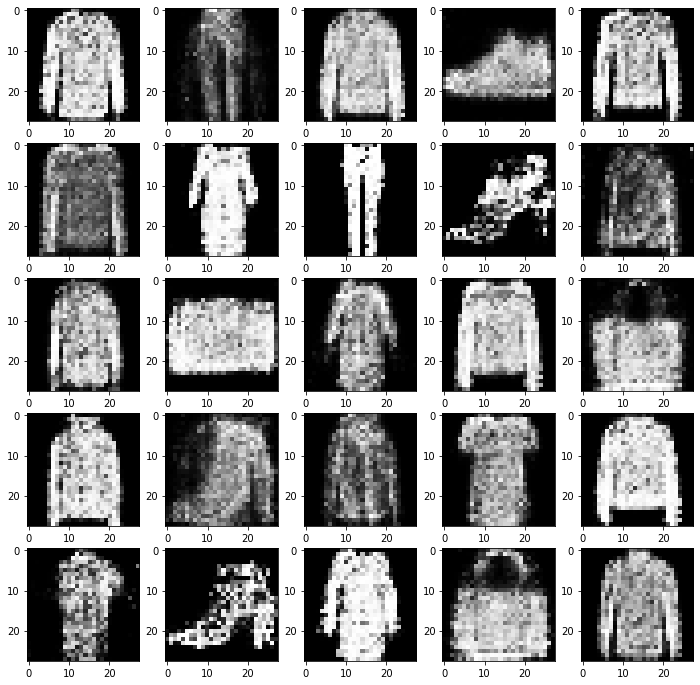

ep :  83


100%|██████████| 273/273 [00:20<00:00, 13.37it/s]


losses ->  0.6941042542457581   0.7185021638870239


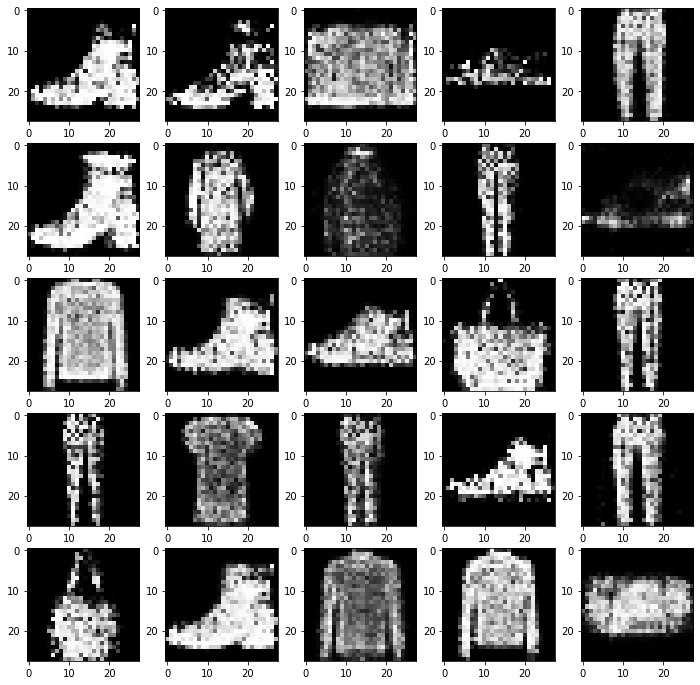

ep :  84


100%|██████████| 273/273 [00:21<00:00, 12.95it/s]


losses ->  0.6908355355262756   0.7254929542541504


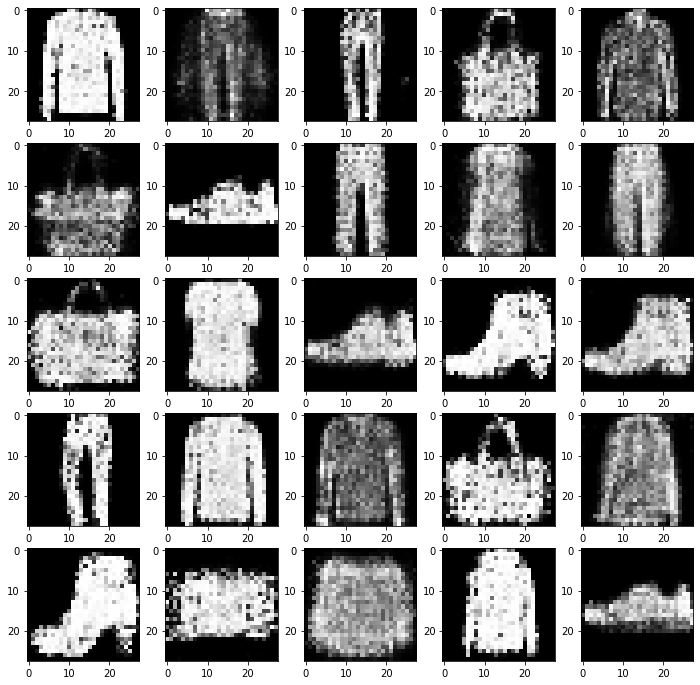

ep :  85


100%|██████████| 273/273 [00:20<00:00, 13.53it/s]


losses ->  0.6921785473823547   0.691874086856842


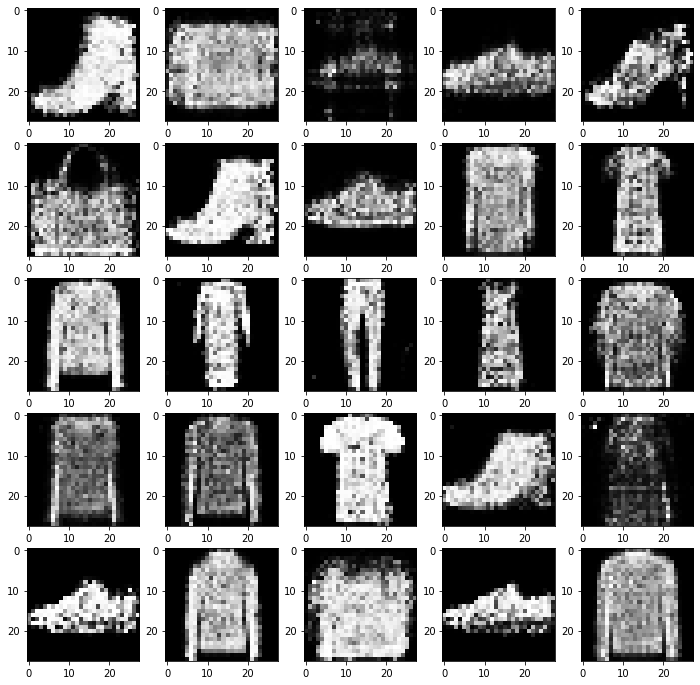

ep :  86


100%|██████████| 273/273 [00:20<00:00, 13.33it/s]


losses ->  0.6879318952560425   0.7101384997367859


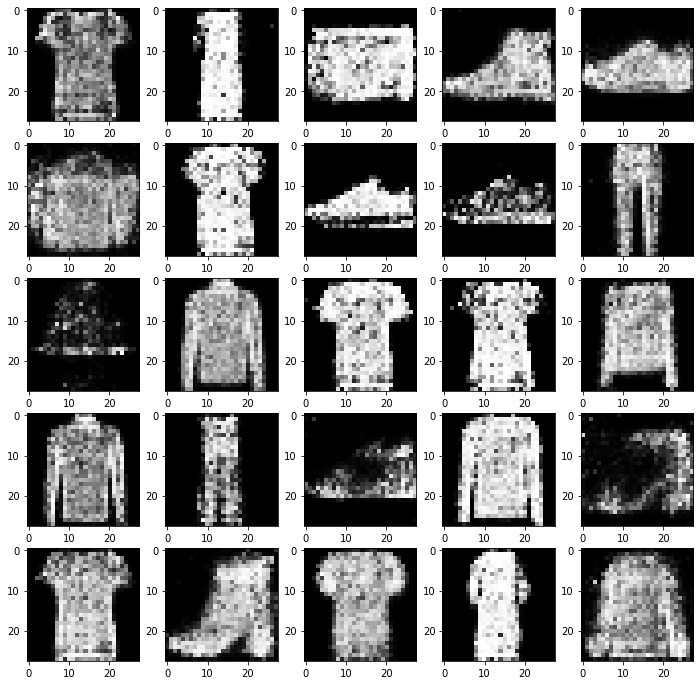

ep :  87


100%|██████████| 273/273 [00:20<00:00, 13.43it/s]


losses ->  0.6911545395851135   0.7099575400352478


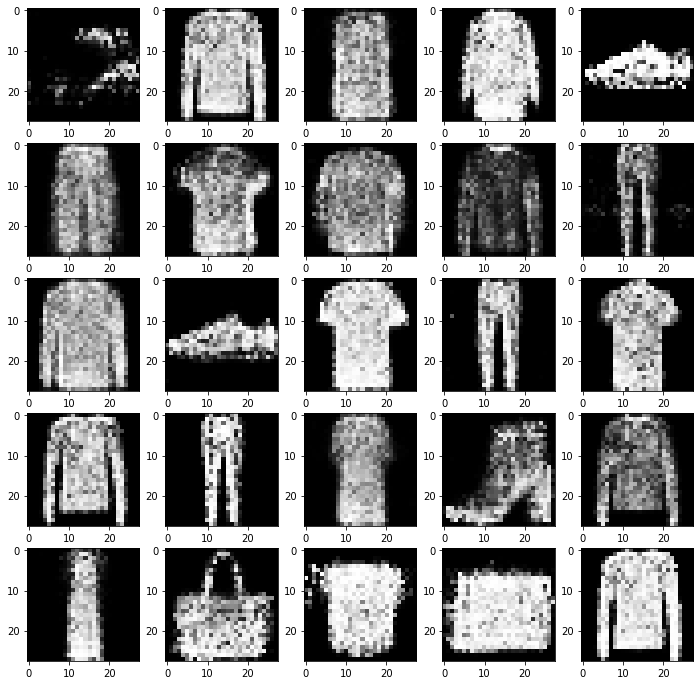

ep :  88


100%|██████████| 273/273 [00:21<00:00, 12.89it/s]


losses ->  0.6899730563163757   0.6953811645507812


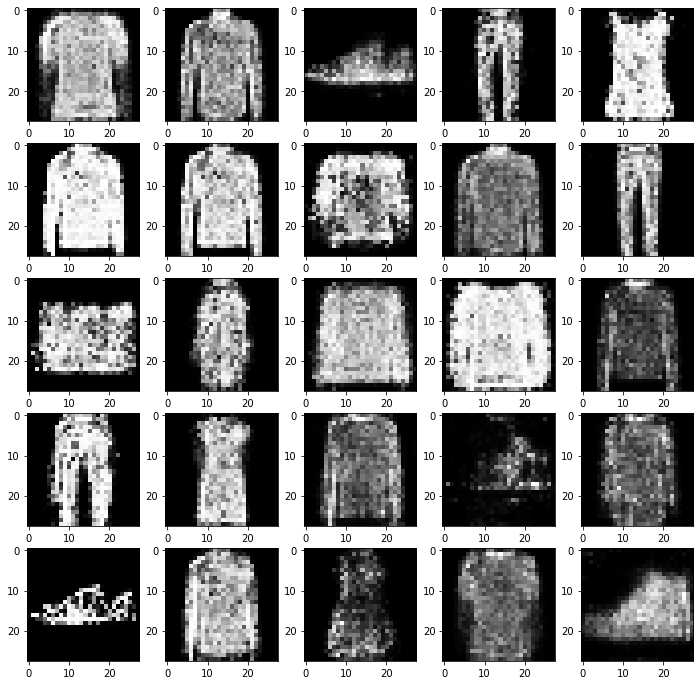

ep :  89


100%|██████████| 273/273 [00:20<00:00, 13.38it/s]


losses ->  0.6858453154563904   0.6999446153640747


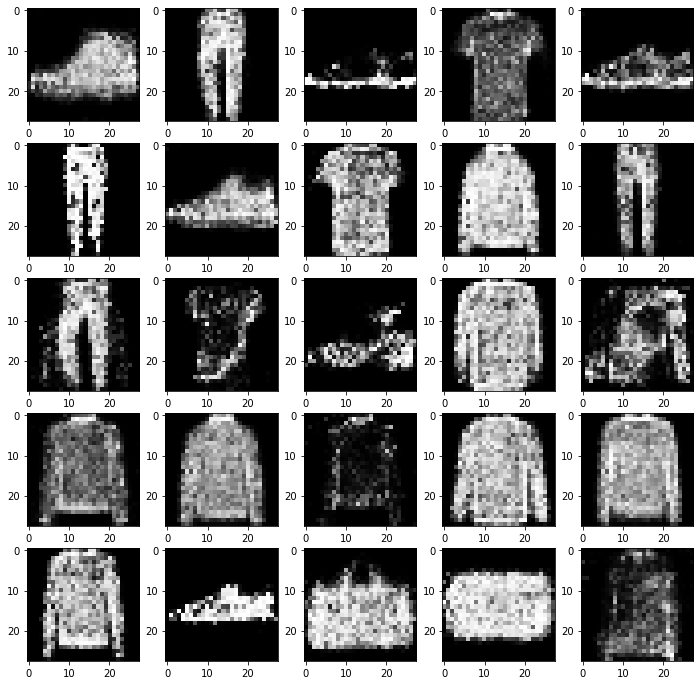

ep :  90


100%|██████████| 273/273 [00:20<00:00, 13.36it/s]


losses ->  0.6878374814987183   0.7005303502082825


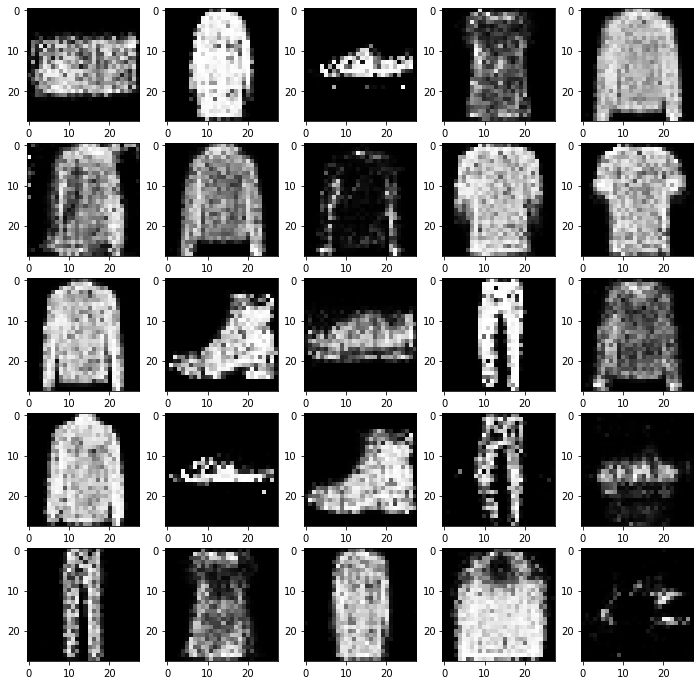

ep :  91


100%|██████████| 273/273 [00:20<00:00, 13.49it/s]


losses ->  0.6929662227630615   0.6902366876602173


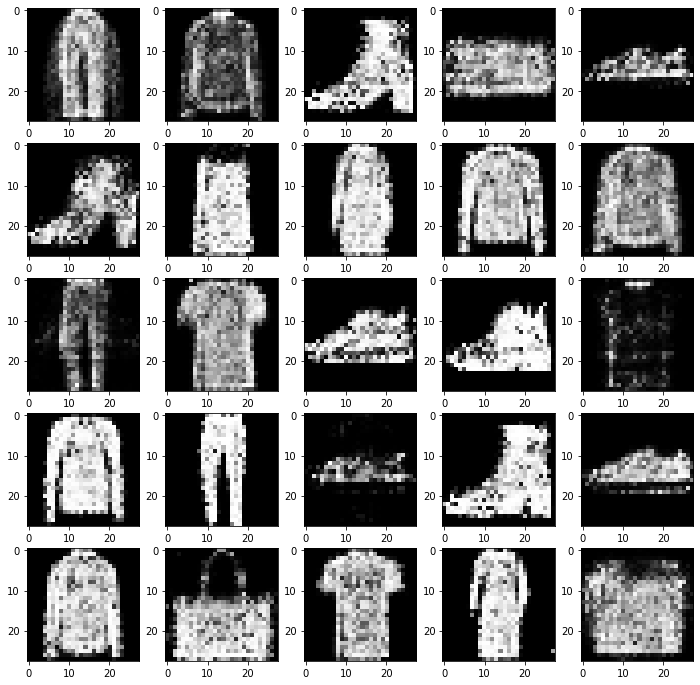

ep :  92


100%|██████████| 273/273 [00:21<00:00, 12.71it/s]


losses ->  0.6907463073730469   0.6973235011100769


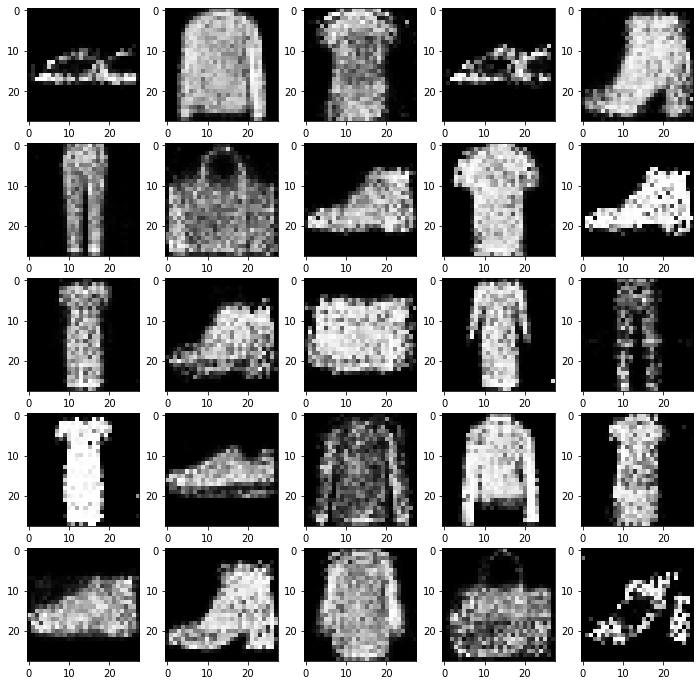

ep :  93


100%|██████████| 273/273 [00:20<00:00, 13.30it/s]


losses ->  0.6948233842849731   0.6785377860069275


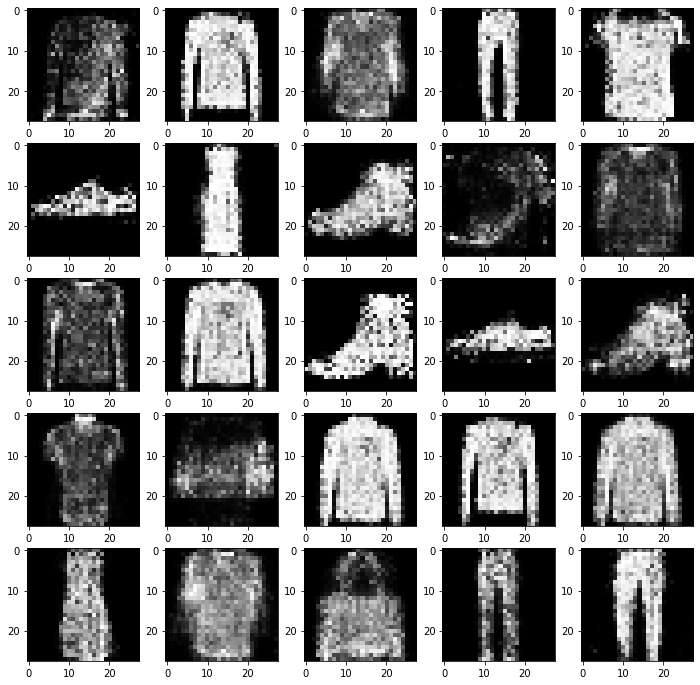

ep :  94


100%|██████████| 273/273 [00:20<00:00, 13.40it/s]


losses ->  0.6922688484191895   0.7034856081008911


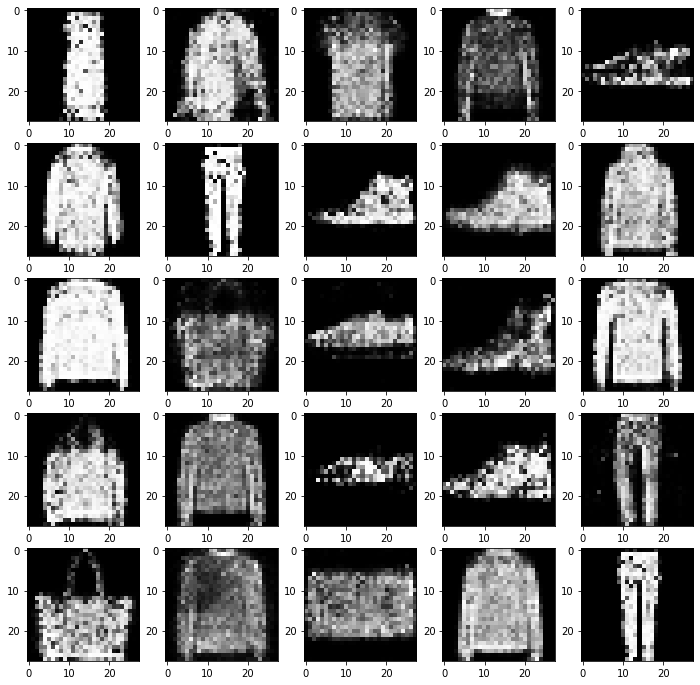

ep :  95


100%|██████████| 273/273 [00:20<00:00, 13.37it/s]


losses ->  0.6929007172584534   0.7156384587287903


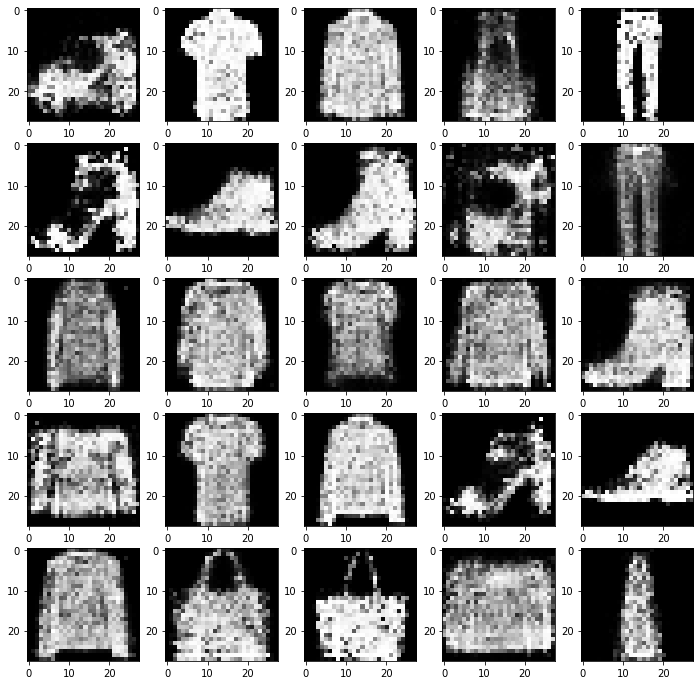

ep :  96


100%|██████████| 273/273 [00:21<00:00, 12.97it/s]


losses ->  0.6824505925178528   0.729070782661438


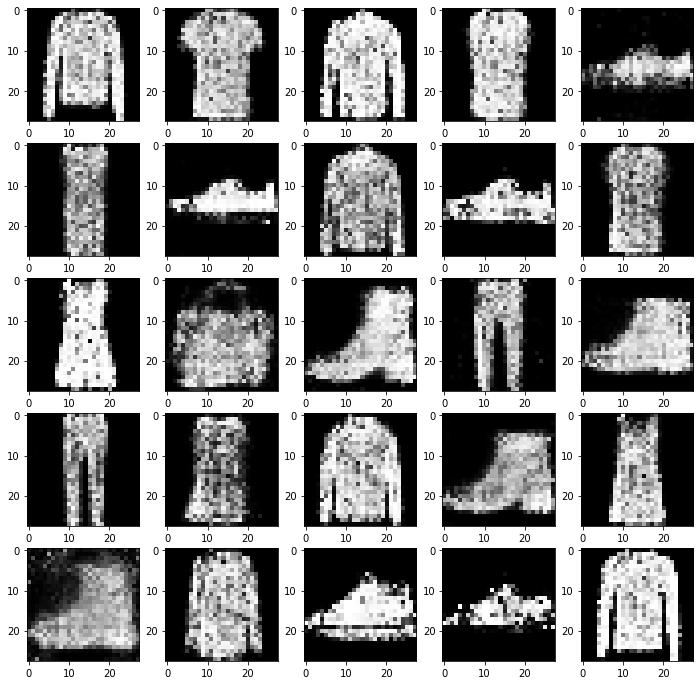

ep :  97


100%|██████████| 273/273 [00:20<00:00, 13.35it/s]


losses ->  0.6915246248245239   0.7009742856025696


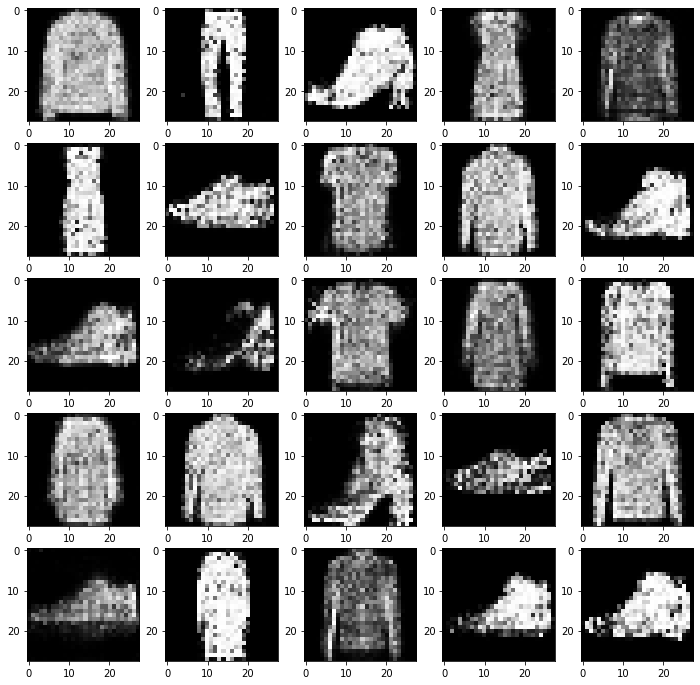

ep :  98


100%|██████████| 273/273 [00:20<00:00, 13.42it/s]


losses ->  0.6915623545646667   0.7090840935707092


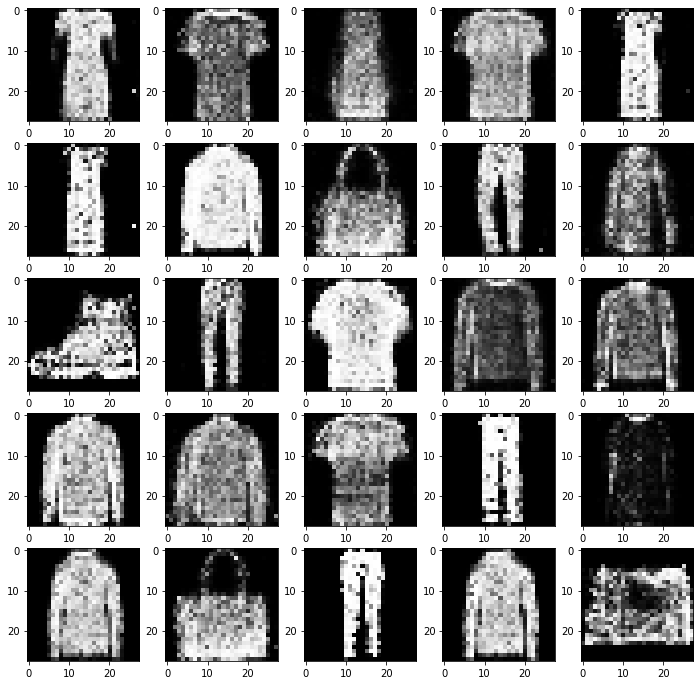

ep :  99


100%|██████████| 273/273 [00:20<00:00, 13.31it/s]


losses ->  0.6894104480743408   0.6962816715240479


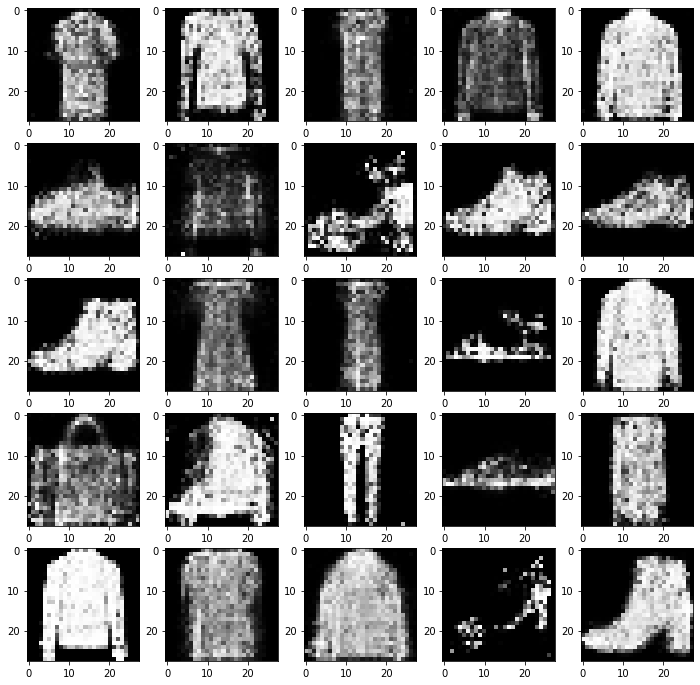

In [12]:
for i in range(epochs):
  print("ep : ",i)
  for j in tqdm(range(len(X) // batch_size)):
    xreal , yreal = X[np.random.randint(0 , len(X) , half_batch)].reshape(half_batch, 28,28,1), np.ones(half_batch).reshape(half_batch , 1)

    xfake, yfake = gen.predict(np.random.randn(half_batch , n )) , np.zeros(half_batch).reshape(half_batch , 1)

    xfinal  , yfinal = np.vstack((xreal , xfake)) , np.vstack((yreal , yfake))

    dloss = disc.train_on_batch(xfinal , yfinal)

    gloss = gan.train_on_batch(np.random.randn(batch_size , n ) , np.ones(batch_size).reshape(batch_size , 1))

    losses.append([dloss , gloss])


  fig , axes = plt.subplots(5,5,figsize=(12,12))
  print("losses -> " , dloss , " " , gloss)
  for k in range(5):
    for l in range(5):
      axes[k,l].imshow(0.5+(gen.predict(np.random.randn(n).reshape(1,n)).reshape(28,28))/2 , cmap='gray')
  
  plt.show()
  plt.close()

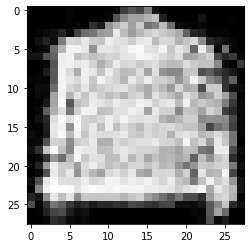

In [16]:
plt.imshow(gen.predict(np.random.randn(1,100)).reshape(28,28) , cmap='gray')

In [17]:
l = np.array(losses)

l.shape

(27300, 2)

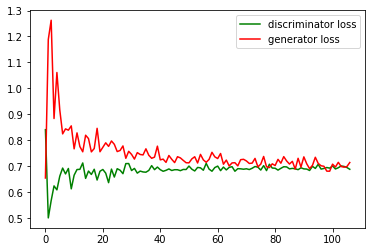

In [24]:
plt.plot(l[::batch_size,0] , color = 'green')
plt.plot(l[::batch_size,1] , color = 'red')
plt.legend(["discriminator loss", "generator loss"], loc ="upper right")